<a href="https://colab.research.google.com/github/Andrew11Morozov/ex.practic/blob/main/morozov_ab_games_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Сборный проект 1****

Магазин «Стримчик» продаёт по всему миру компьютерные игры.\
Из открытых источников доступны исторические данные о продажах игр,\
оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).\
**Необходимо выявить определяющие успешность игры закономерности.**\
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Подготовка данных

**Открываем файл** с данными и **изучаем** общую информацию.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')

Шаг за шагом изучаем данные:
    

Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными

Выводим на экран первые десять строк датафрейма.

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Названия столбцов не соответствуют правилам PYTHON.\
**Требует исправления!**

В данных имеются пропуски. Уточним количество и названия столбцов, вызвав общую информацию:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Визуализируем количество пропусков

In [ ]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Где боьше всего пропусков?' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

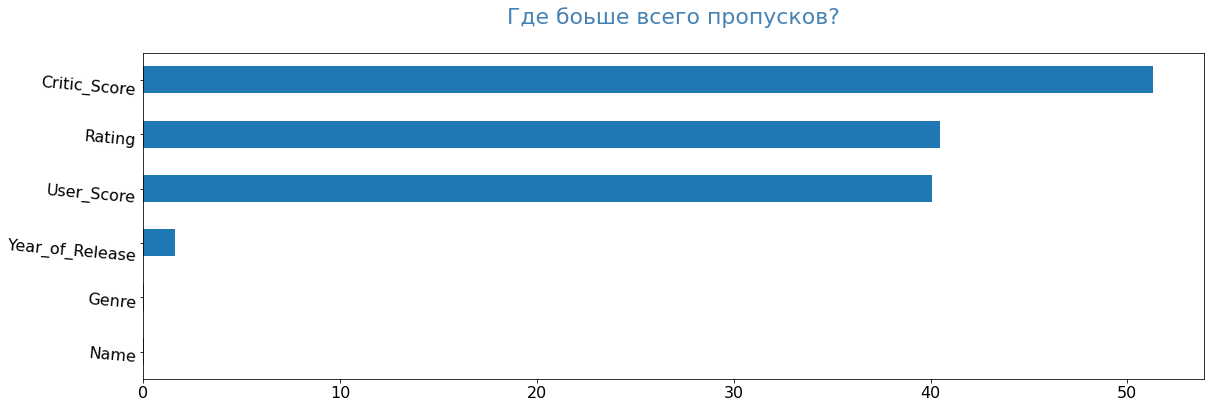

In [ ]:
pass_value_barh(df)

Пропуски присутствуют в 6 колонках из 11.

Больше всего пропусков в столбце `Critic_Score` — оценка критиков

и в столбце `User_Score` — оценка пользователей

В столбцах  Genre и Name пропуски в 2х строчках. Безжалостно расстаемся с этими строчками во втором разделе проекта.

С пропусками в стороке `Year_of_Release` — год выпуска разберемся позднее, а пока запомним, что год релиза не вовсех строчках.

Просмотрим уникальные значения по столбцам и распределение по значениям.

In [ ]:
df['Name'].unique()  # Name — название игры

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted                          12
Madden NFL 07                                         9
FIFA 14                                               9
Ratatouille                                           9
LEGO Marvel Super Heroes                              9
                                                     ..
Gloria Union                                          1
Galactic Attack                                       1
Valkyrie Drive: Bhikkhuni                             1
Transformers: Revenge of the Fallen (DS Versions)     1
Pikmin 2                                              1
Name: Name, Length: 11559, dtype: int64

In [ ]:
grup_name = df.groupby('Name')['Name'].agg('count')
print (grup_name)
#grup_name.plot(kind = "bar", figsize = (15,3)); # открыть перед отправкой на проверку

Name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: Name, Length: 11559, dtype: int64


Для названий игр таблица и гистограмма получились не очень информативными. Поэтому воспользуемся  describe() для столбца `Name` и сгруппированному `grup_name`

In [ ]:
df['Name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [ ]:
grup_name.describe()

count    11559.000000
mean         1.445886
std          0.990607
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: Name, dtype: float64

Средняя продажа игр одного наименования в этом магазине - всего 1,45. Очень много продаж по 1 игре за весь период наблюдения. Это обозначает, что не много игр с одним названием на разных платформах. 

In [ ]:
df['Platform'].unique() # Platform — платформа

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

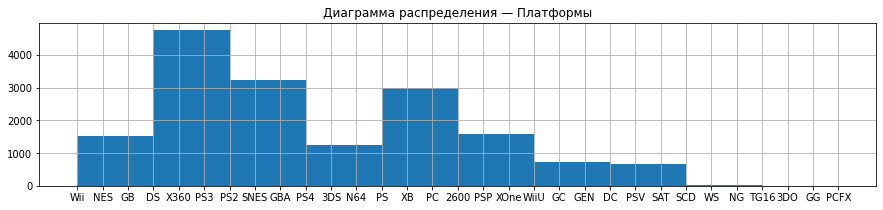

In [ ]:
df['Platform'].hist(figsize = (15,3))
plt.title('Диаграмма распределения — Платформы');

In [ ]:
df['Platform'].describe()

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

Платформы, для которых были куплены игры, разнообразные - 31 шт. Есть лидеры - свыше 4000 игр, есть аусайдеры. Все как обычно .

In [ ]:
df['Year_of_Release'].unique() # Year_of_Release — год выпуска

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Во втором разделе необходимо сменить формат даты - поменять float на datetime или int.

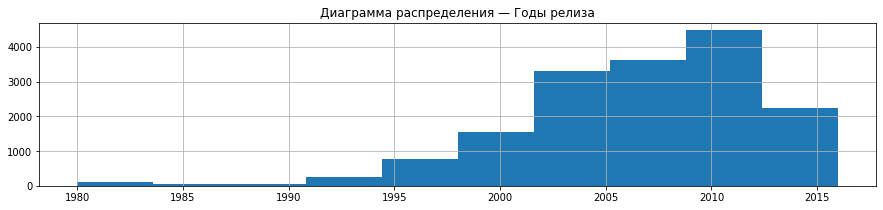

In [ ]:
df['Year_of_Release'].hist(figsize = (15,3));
plt.title('Диаграмма распределения — Годы релиза');

In [ ]:
df['Year_of_Release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Лучше всего продавались игры выпуска 2010 - 2012 годов

In [ ]:
df['Genre'].unique() # Genre — жанр игры

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

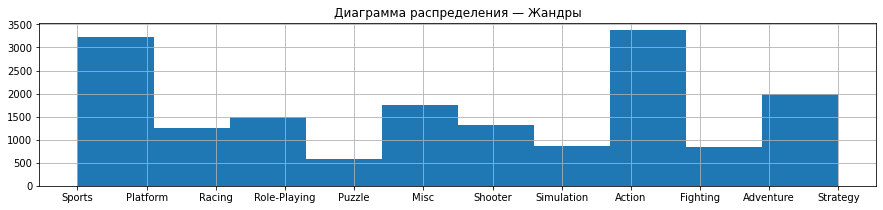

In [ ]:
df['Genre'].hist(figsize = (15,3));
plt.title('Диаграмма распределения — Жандры');

По жанрам продажи игр распределились тоже понятным образом. В лидерах продаж - Sports, Action. В аусайдерах - Puzzle.

Посмотрим, что у них с ретингами.

In [ ]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

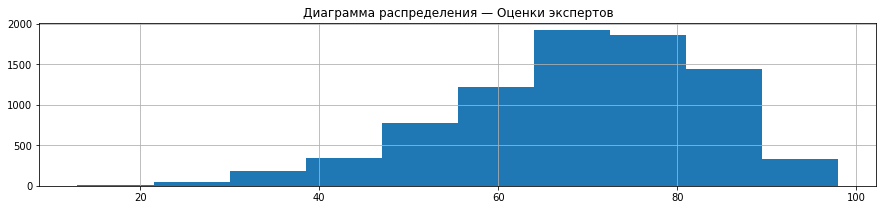

In [ ]:
df['Critic_Score'].hist(figsize = (15,3));
plt.title('Диаграмма распределения — Оценки экспертов');

In [ ]:
df['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

Средний рейтинг продавемых игр от признанных критиков около 70. Чем ближе к среднему рейтингу, тем больше продается игр. Продаж игр с очень высоким рейтингом немного. Хотя, это может быть связано с тем, что таких игр меньше. Игр с маленькими рейтингами меньше продаж - это нормально.

In [ ]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df[df['User_Score']=='tbd'].count()

Name               2424
Platform           2424
Year_of_Release    2376
Genre              2424
NA_sales           2424
EU_sales           2424
JP_sales           2424
Other_sales        2424
Critic_Score       1082
User_Score         2424
Rating             2374
dtype: int64

Для корректного представления данных меняем тип данных уже в первом разделе:

In [ ]:
df['User_Score'] = df[df['User_Score']!='tbd']['User_Score'].astype(float) # смело меняем тип данных на float
df['User_Score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
df[df['User_Score']=='tbd'].count()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

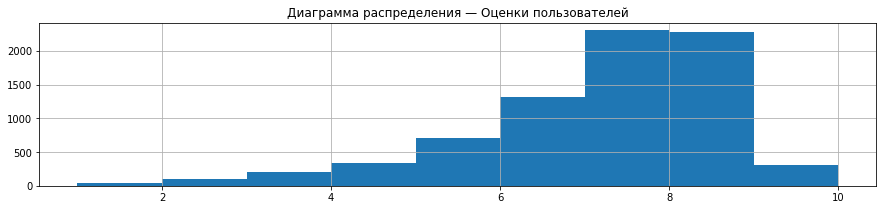

In [ ]:
df['User_Score'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], figsize = (15,3));
plt.title('Диаграмма распределения — Оценки пользователей');

In [ ]:
df['User_Score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

Ситуация с рейтингами игр от игроков аналогична рейтингам от специалистов.

Присутствует некий рейтинг "tbd" в количестве -2424 пометок, что сравнимо с максимальным количеством оценок пользователей.

Интернет подсказывает: "TBD" - To Be Determined, то есть "Будет определено". 'tbd' - пока нет оценки.

In [ ]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

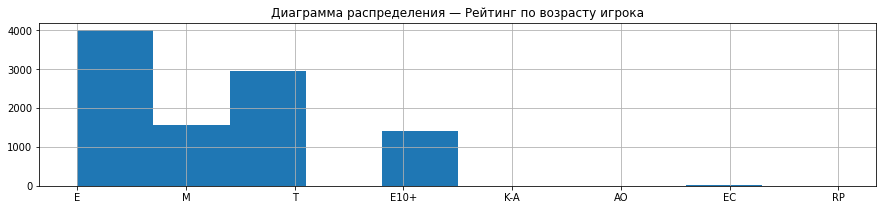

In [ ]:
df['Rating'].hist(figsize = (15,3));
plt.title('Диаграмма распределения — Рейтинг по возрасту игрока');

Лидеры продаж «E» («Everyone») — «Для всех»\
«T» («Teen») — «Подросткам»

Совсем мало - «AO» («Adults Only 18+») — «Только для взрослых»

### Подготовка данных

Выполняем намеченные действия по замеченным в 1 разделе неточностям.

Исправляем выявленные недостатки данных:

Перемеинование столбцов:

In [ ]:
df = df.rename(columns={'Name': 'name'})
df = df.rename(columns={'Platform': 'platform'})
df = df.rename(columns={'Year_of_Release': 'year_of_release'})
df = df.rename(columns={'Genre': 'genre'})
df = df.rename(columns={'NA_sales': 'na_sales'})
df = df.rename(columns={'EU_sales': 'eu_sales'})
df = df.rename(columns={'JP_sales': 'jp_sales'})
df = df.rename(columns={'Other_sales': 'other_sales'})
df = df.rename(columns={'Critic_Score': 'critic_score'})
df = df.rename(columns={'User_Score': 'user_score'})
df = df.rename(columns={'Rating': 'rating'})
# df.info() # test or check

Удаляем строки с пропусками в колонках `name` и `genre`, а также после некоторого осмысления и `year_of_release`:

In [ ]:
df = df.dropna(subset=['name']) 
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['year_of_release']) # временно пока нет времени в принципе можно востановить, но не страшно и потерять
# всего 1,5 %
# df.info() # check

Меняем формат столбца  `year_of_release`:

In [ ]:
#df["year_of_release"] = pd.to_datetime(df["year_of_release"], format="%Y")
# на графиках смотриться выгоднее int
df["year_of_release"] = df["year_of_release"].astype(int)

***Окончательно проверяем, что данные готовы к исследованию.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Для удобства восприятия и красоты выведения графиков приведем year_of_release к типу int

Возможные причины, которые привели к этим пропускам:
1. Квалифицированные критики не оценивали игры;
2. Пользователи поленились оценить игры либо перевели в разряд "TBD" - To Be Determined, то есть "Будет определено". 'tbd' - пока нет оценки;
3. Рейтинг от организации ESRB пока не присвоен. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Тем более, что данные за 2016 год могут быть неполными.


Посчитаем продажи во всех регионах и запишем данные в отдельный столбец:

In [ ]:
df['summa'] = df['na_sales'] + df['eu_sales'] +df['jp_sales'] + df['other_sales']

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Общие продажи посчитаны верно!

📌 Можно также использовать такой вариант: 

`df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)`</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Такая идея даже не пришла мне в голову, Но обязательно запомню на следующие работы.</div>

In [ ]:
df.head() # test

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


С **пропусками в рейтингах** ни как не работаем, **оставляем как есть**. Внесение изменений в данные при неверной подстановке могут значительно изменить выводы.


### Исследовательский анализ данных

После подготовки данных проведем более глубокое исследование представленой таблицы.

Начнм с анализа выручки от реализации игр с различными годами выпуска.

***1. Анализ выручки от реализации игр с различными годами выпуска***

year_of_release
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97
2003    357.54
2004    418.68
2005    457.82
2006    517.71
2007    604.75
2008    671.50
2009    658.82
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: summa, dtype: float64


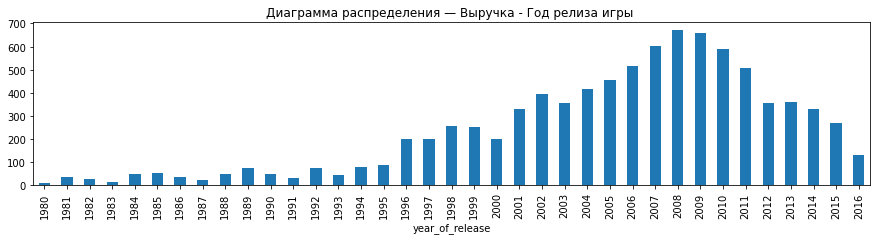

In [ ]:
# Группируем по годам
grup_year_of_release = df.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release)
grup_year_of_release.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка - Год релиза игры ');

Игры выпуска до 1995 года не вносят значительный вклад в общую выручку магазина.\
Наиболее продаваемые игры выпущены в 2008 - 2009 годах.\
Более новые игры выпуска после 2010 года продаются хуже, чем проверенные временем и рейтинговой оценкой других игроков.

***2. Более внимательно исследуем платформы для которых продавались игры, проданные в 2016 году.***\

***Рассмотрим продажи по платформам.***

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       28.35
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: summa, dtype: float64


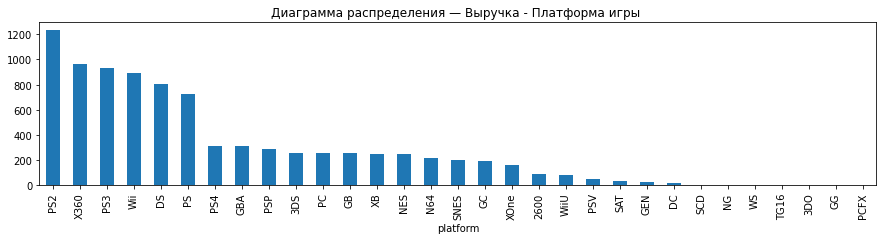

In [ ]:
# Группируем по платформам
grup_platform = df.groupby('platform')['summa'].agg('sum')
print (grup_platform)
grup_platform.sort_values(ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения — Выручка - Платформа игры ');

Как и следовало ожидать самыми популярными проданными играми стали игры для игровых приставок PS2 и Х360.

***2.1 Выбирем несколько платформ с наибольшими суммарными продажами и построим распределение по годам выпуска проданных игр.***

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: summa, dtype: float64


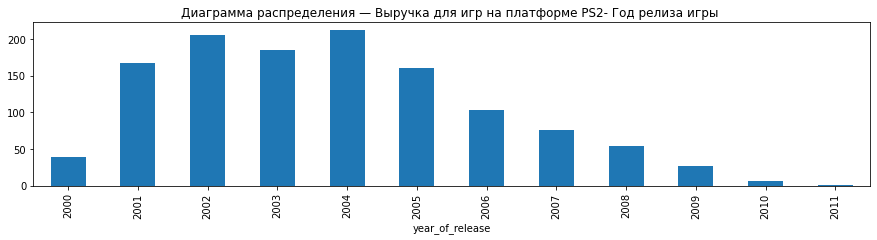

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ps2 = df [df['platform'] == 'PS2'] # для PS2
grup_year_of_release_ps2 = df_ps2.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release_ps2)
grup_year_of_release_ps2.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка для игр на платформе PS2- Год релиза игры ');

year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: summa, dtype: float64


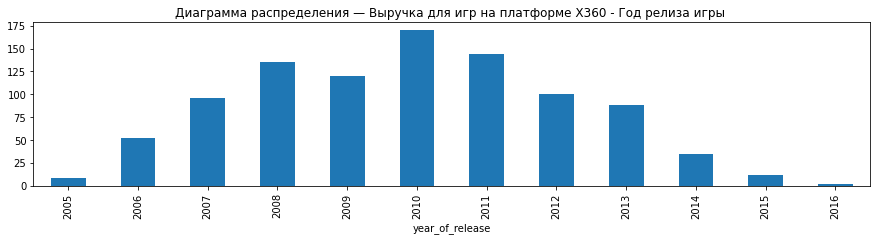

In [ ]:
# Группируем по годам наиболее популярных платформ
df_x360 = df [df['platform'] == 'X360'] # для X360
grup_year_of_release_x360 = df_x360.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release_x360)
grup_year_of_release_x360.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка для игр на платформе X360 - Год релиза игры ');

year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: summa, dtype: float64


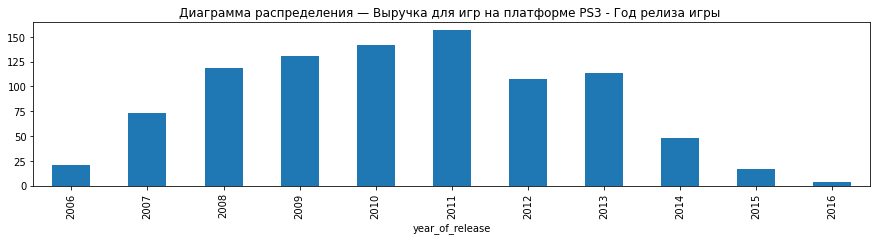

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ps3 = df [df['platform'] == 'PS3'] # для PS3
grup_year_of_release_ps3 = df_ps3.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release_ps3)
grup_year_of_release_ps3.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка для игр на платформе PS3 - Год релиза игры ');

year_of_release
2000     0.99
2001    22.26
2002    48.01
2003    55.04
2004    65.42
2005    49.08
2006    10.04
2007     0.55
2008     0.18
Name: summa, dtype: float64


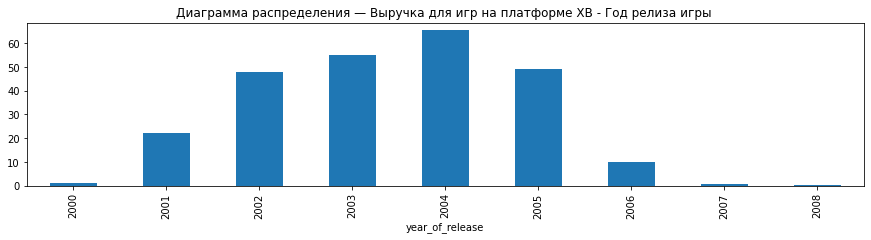

In [ ]:
# Группируем по годам наиболее популярных платформ
df_xb = df [df['platform'] == 'XB'] # для XB
grup_year_of_release_xb = df_xb.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release_xb)
grup_year_of_release_xb.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка для игр на платформе XB - Год релиза игры ');

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: summa, dtype: float64


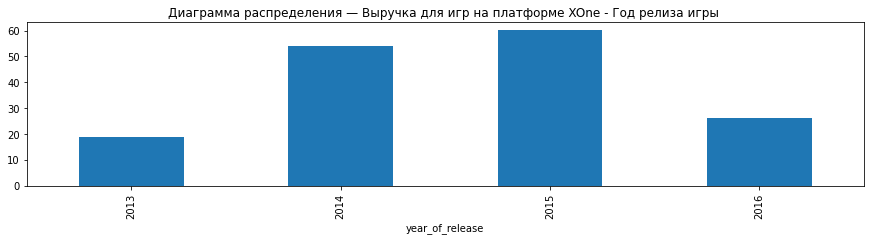

In [ ]:
# Группируем по годам наиболее популярных платформ
df_xone = df [df['platform'] == 'XOne'] # для XOne
grup_year_of_release_xone = df_xone.groupby('year_of_release')['summa'].agg('sum')
print (grup_year_of_release_xone)
grup_year_of_release_xone.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка для игр на платформе XOne - Год релиза игры ');

Анализируя полученные графики, можно увидеть, что после появления платформа в течении 5 лет набирает количество игр для этой платформы. И на 5й год количество игр реализуемых на этой платформе становиться максимальным. Затем количество игр для этой платформы становиться меньше (новых игр не выпускается) и в течении 5 лет после максимума продажи падают до нуля.

***3. Определение актуального периода для принятия решения о построения прогноза на 2017 год.***

Посмотрим долю вносимую продажей игр в 2016 году от года производства игры.

In [ ]:
grup_year_of_release_ratio = df.groupby('year_of_release')['summa'].agg('sum') / df['summa'].agg('sum')

In [ ]:
# print (grup_year_of_release_ratio)

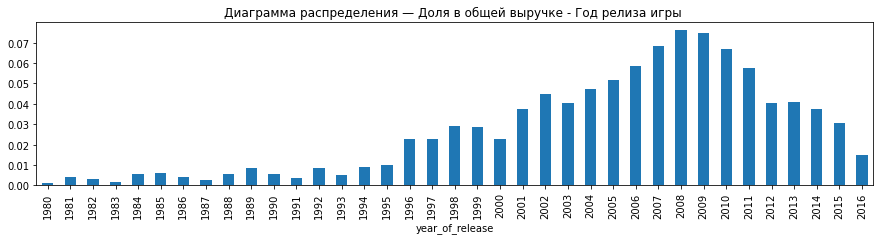

In [ ]:
grup_year_of_release_ratio.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Доля в общей выручке - Год релиза игры ');

Выбирем те игры, год выход на рынок которых не раньше 2009 года. Продажи этих игр будут, или расти, если их релиз состоялся с 2011 по 2016 год, или незначительно падать, если релиз сотоялся после 2009 года, находясь на достаточно высоком уровне.

Продажи игр, выпущеных до 2009 года, носят незначительный характер. посмотрим сначала на графике, посмотрев не в выручке, а в количестве проданных игр по релизу. 

In [ ]:
grup_year_of_release_cnt = df.groupby('year_of_release')['summa'].agg('count')

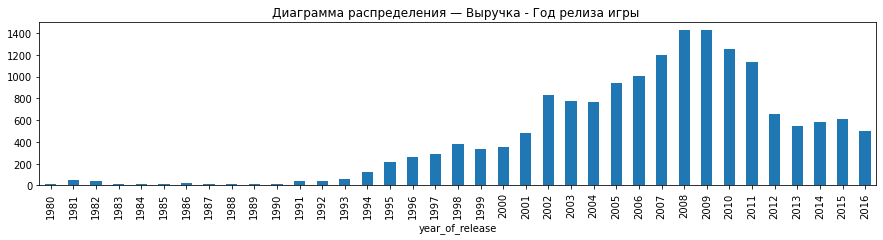

In [ ]:
grup_year_of_release_cnt.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка - Год релиза игры ');

Влиять на тенденции игры с "древним" годом выпуска не могут. С каджым годом их влияние на продажи уменьшается. **Отбрасываем все данные до 2009 года**. Формируем новый датасет.

При рассмотрении игр с релизом более 10 лет видна следующая тенденция:
После выхода в свет новая платформа в течении 5 лет набирает продажи. Я связываю это с тем, что с одной стороны потребители покупают устройства на этой платформе не сразу а постепенно. И производители игр производят для этой новой платформы игры не сразу, а тоже постипенно.

Через 5 лет, как правило, происходит насышение. И начинается потеря интереса потребителей к этой платформе - появляются новые более современные устройства на новых платформах. Производители игр перестают писать контент для этой платформы. И в течении следующих 5ти лет продажи уменьшаются. 

In [ ]:
df_2009 = df[df['year_of_release'] >= 2009]

In [ ]:
df_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6703 entries, 3 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6703 non-null   object 
 1   platform         6703 non-null   object 
 2   year_of_release  6703 non-null   int64  
 3   genre            6703 non-null   object 
 4   na_sales         6703 non-null   float64
 5   eu_sales         6703 non-null   float64
 6   jp_sales         6703 non-null   float64
 7   other_sales      6703 non-null   float64
 8   critic_score     2963 non-null   float64
 9   user_score       3113 non-null   float64
 10  rating           4124 non-null   object 
 11  summa            6703 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 680.8+ KB


Мы установили новый период выхода игр в свет. Совсем старые игры мы не рассматриваем. 

***Все исследования проводим на новом периоде: 2009 год - 2016 год***

# Выводы по разделу 1-3

На основании исследований данных продажи магазина выявлены следующие закономерности:\
**-продажи игр зависят от года выпуска этих игр**\
**-игры старше 10 лет не оказывают особого влияния на тенденции продаж в будующих периодах**\
**-игровые платформы имеют десятилетний жизненый цикл, в котором, как правило, первые 5 лет идет рoст продаж, а последующие 5 лет снижение продаж игр для устройств на этих платформах.**\
**-для прогнозироаания перспектив надо использовать данные только новых платформ, показывающих рост.**


***4. Рассмотрим новые данные относительно платформ, на которых можно использовать купленные игры.***

platform
3DS     257.81
DS      243.29
PC      138.87
PS2      32.49
PS3     718.67
PS4     314.14
PSP     101.83
PSV      53.81
Wii     429.94
WiiU     82.19
X360    670.70
XOne    159.32
Name: summa, dtype: float64


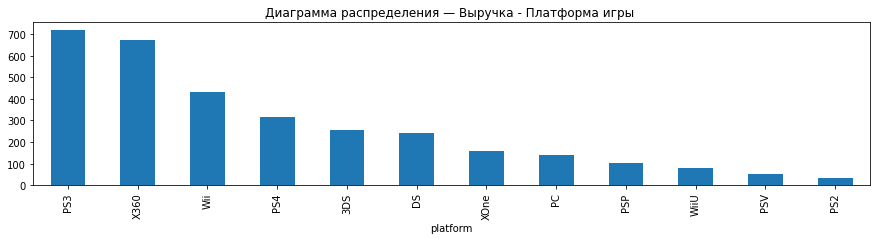

In [ ]:
grup_platform_2009 = df_2009.groupby('platform')['summa'].agg('sum')
print (grup_platform_2009)
grup_platform_2009.sort_values(ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения — Выручка - Платформа игры ');

Рассмотрим тенденции для каждой из платформ по годам релиза игр.

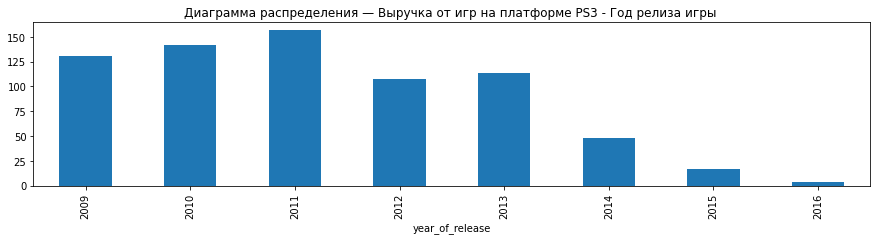

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ps3_2009 = df_2009 [df_2009['platform'] == 'PS3'] # для PS3
grup_year_of_release_ps3_2009 = df_ps3_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_ps3_2009) # control
grup_year_of_release_ps3_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PS3 - Год релиза игры ');

Судя по предыдущим исследованиям можно утверждать, что игры 2011 года достигли своего максимума продаж, игры выпуска с 2012 по 2016 год имеют тенденцию к росту, а игры выпуска находясь в высокой степени продаж имеют тенденцию к уменьшению продаж.

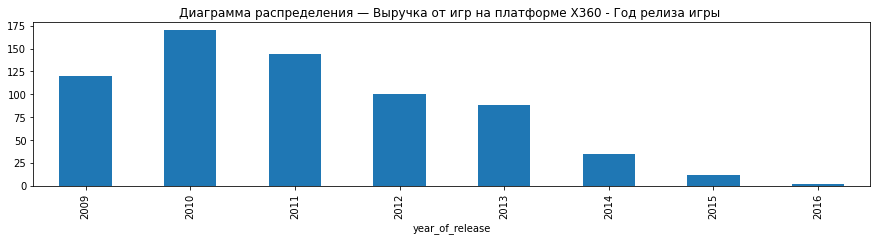

In [ ]:
# Группируем по годам наиболее популярных платформ
df_x360_2009 = df_2009 [df_2009['platform'] == 'X360'] # для X360
grup_year_of_release_x360_2009 = df_x360_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_x360_2009) # control
grup_year_of_release_x360_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе X360 - Год релиза игры ');

Умирающая платформа (данные за 2016 год - неполные, о чем мы были предупреждены). Падение продаж связан с вытеснением этой платформы более новыми. Тем не менее еще высокий уровень продаж, за счет игр, проверенных временем выпуска 2010-2012 годов.

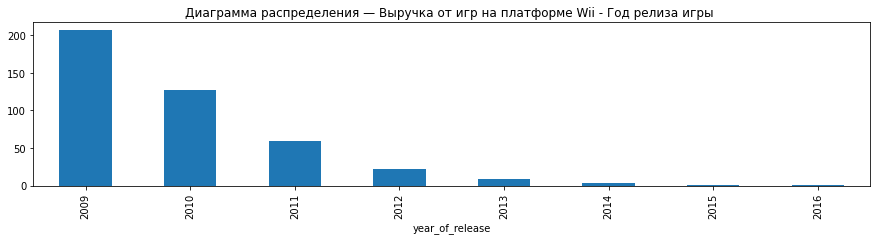

In [ ]:
# Группируем по годам наиболее популярных платформ
df_wii_2009 = df_2009 [df_2009['platform'] == 'Wii'] # для Wii
grup_year_of_release_wii_2009 = df_wii_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_wii_2009) # control
grup_year_of_release_wii_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе Wii - Год релиза игры ');

Платформа Wii на всем исследуемом периоде выпуска игр теряет продажи, оставаясь третьей по популярности игровой платформой.

Скорее всего она была замещена более современной платформой WiiU, которую мы исследуем десятой. Уменьшение количества продаж, скорее всего связано с уменьшением выпуска игр для этой платформы.

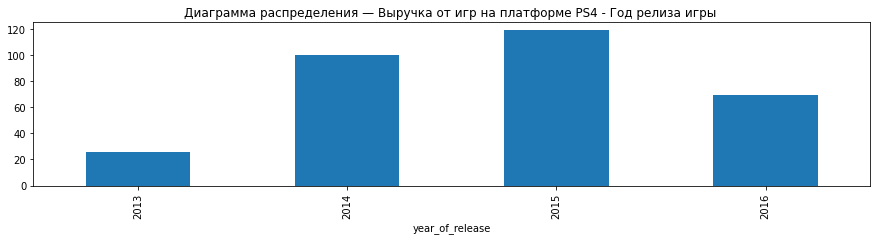

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ps4_2009 = df_2009 [df_2009['platform'] == 'PS4'] # для PS4
grup_year_of_release_ps4_2009 = df_ps4_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_ps4_2009) # control
grup_year_of_release_ps4_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PS4 - Год релиза игры ');

Новейшая, выпущенная в 2013 году платформа PS4, показывает рост продаж игр для нее (данные за 2016 год - неполные, о чем мы были предупреждены). Рост продаж связан с ростом продаж самой игровой приставки и увеличением (адоптации) игр, с возможностью играть на этих приставках.

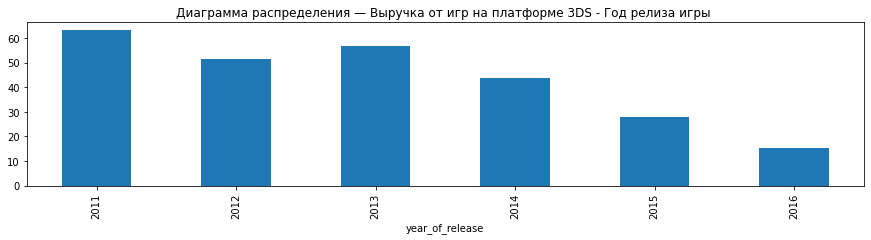

In [ ]:
# Группируем по годам наиболее популярных платформ
df_3ds_2009 = df_2009 [df_2009['platform'] == '3DS'] # для 3DS
grup_year_of_release_3ds_2009 = df_3ds_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_3ds_2009) # control
grup_year_of_release_3ds_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе 3DS - Год релиза игры ');

Еще одна "неудачная" платформа. Игр для этой платформы все меньше, продажи уменьшаются.

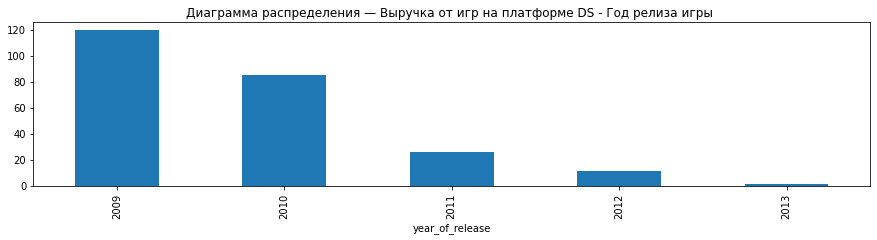

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ds_2009 = df_2009 [df_2009['platform'] == 'DS'] # для DS
grup_year_of_release_ds_2009 = df_ds_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_ds_2009) # control
grup_year_of_release_ds_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе DS - Год релиза игры ');

Старая платформа. Производители приставок пытались компенсировать "уход" своей древней модели выпуском DS4, но неудачно. DS уходит естественным путем, а DS4 что называется "незашла".

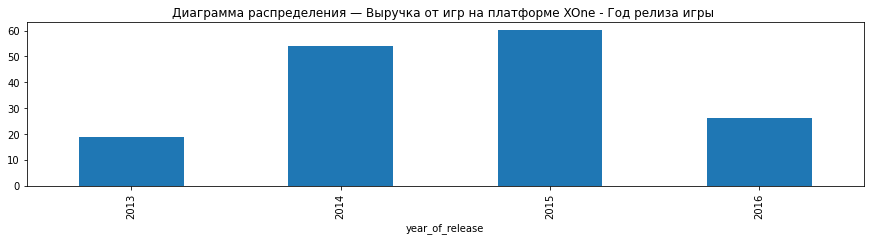

In [ ]:
# Группируем по годам наиболее популярных платформ
df_xone_2009 = df_2009 [df_2009['platform'] == 'XOne'] # для XOne
grup_year_of_release_xone_2009 = df_xone_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_xone_2009) # control
grup_year_of_release_xone_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе XOne - Год релиза игры ');

Еще один будующий лидер, модель приставки, выпущенная до 2013 году на платформе ХOne, показывает рост продаж игр для нее (данные за 2016 год - неполные, о чем мы были предупреждены). Рост продаж связан с ростом продаж самой игровой приставки и увеличением (адоптации) игр, с возможностью играть на этих приставках. Игры для приставок на этой платформе подходят для Х360 и наоборот.

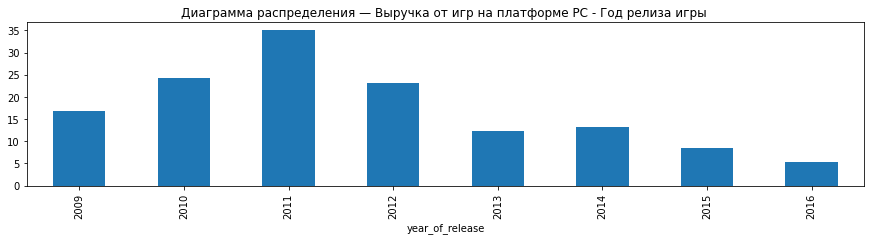

In [ ]:
# Группируем по годам наиболее популярных платформ
df_pc_2009 = df_2009 [df_2009['platform'] == 'PC'] # для PC
grup_year_of_release_pc_2009 = df_pc_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_pc_2009) # control
grup_year_of_release_pc_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PC - Год релиза игры ');

Платформа PC показывает стабильное падение продаж игр свежих годов выпуска. Все больше потребителей приобретает специализированные приставки для игры, отказываясь от игр на домашнем PC компьютере. Игр для PC выпускается все меньше - продажи для этой платформы падают.

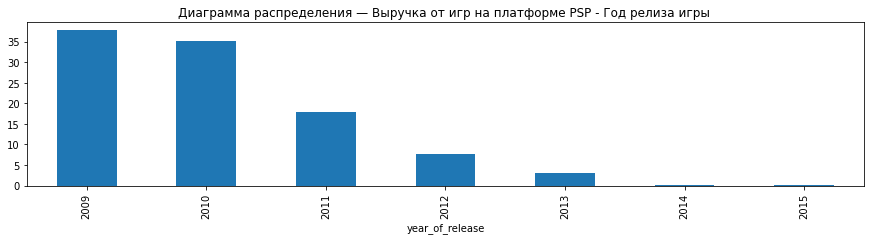

In [ ]:
# Группируем по годам наиболее популярных платформ
df_psp_2009 = df_2009 [df_2009['platform'] == 'PSP'] # для PSP
grup_year_of_release_psp_2009 = df_psp_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_psp_2009) # control
grup_year_of_release_psp_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PSP - Год релиза игры ');

Совсем уходящаяя платформа. Тем не менее платформа входит в ТОП-10. Наладонников практически не осталось, их заменили смартфоны. Тем не менее игр производства и выпуска 2016 года в 2016 году не продано ни одной. Возможно их и не вышло на рынок ни одной.

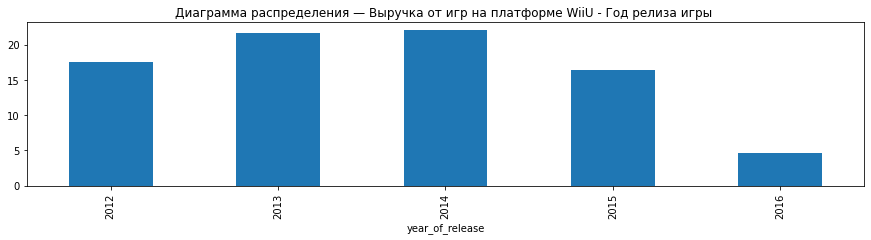

In [ ]:
# Группируем по годам наиболее популярных платформ
df_wiiu_2009 = df_2009 [df_2009['platform'] == 'WiiU'] # для WiiU
grup_year_of_release_wiiu_2009 = df_wiiu_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_wiiu_2009) # control
grup_year_of_release_wiiu_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе WiiU - Год релиза игры ');

Новая платформа, выпущенная в 2012 году взамен Wii, должна показывать рост по нашим расчетам до 2017 года. Однако уже для игр с релизом 2015 год игры показывают падение. Возможно дело в сильнейшей конкуренции со стороны Х-box и PlayStanton/

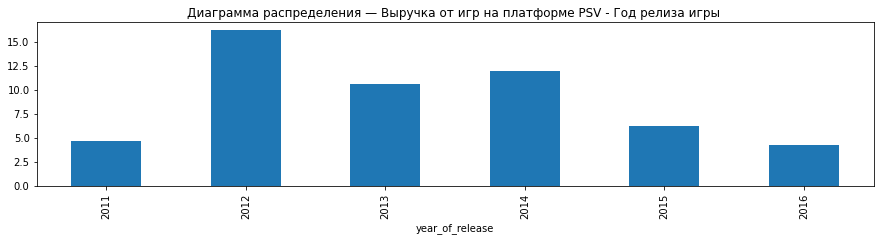

In [ ]:
# Группируем по годам наиболее популярных платформ
df_psv_2009 = df_2009 [df_2009['platform'] == 'PSV'] # для PSV
grup_year_of_release_psv_2009 = df_psv_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_psv_2009) # control
grup_year_of_release_psv_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PSV - Год релиза игры ');

Покидаем ТОП-10. Платформа PSV, зародившись в 2011 году, демонстриловала к 2012 году взрывной рост продаж игр выпуска 2012 года, а затем снижение 2014 и 2015 года. Ставить на увеличение продаж в 2017 году я бы не стал.

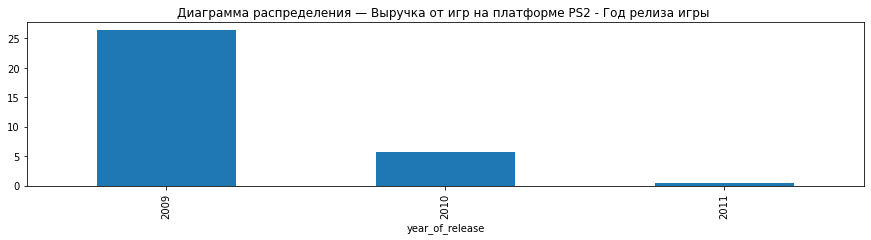

In [ ]:
# Группируем по годам наиболее популярных платформ
df_ps2_2009 = df_2009 [df_2009['platform'] == 'PS2'] # для PS2
grup_year_of_release_ps2_2009 = df_ps2_2009.groupby('year_of_release')['summa'].agg('sum')
# print (grup_year_of_release_ps2_2009) # control
grup_year_of_release_ps2_2009.plot(kind = "bar", figsize = (15,3));
plt.title('Диаграмма распределения — Выручка от игр на платформе PS2 - Год релиза игры ');

На последнее - 12е место нашего рейтинга попала умершая платформа PS2. Игры для этой платформы не выходят с 2011 года. Она вытеснена младшими братьями - PS3, PS4, присутствующими в нашем рейтинге. 

# Выводы по разделу 4

Оценив продажи в 2016 году по платформам, внесшим самый большой вклад в выручку с релизов выхода игр не ранее 2009 года можно сделать следующие выводы:

- Лидеры продаж подтверждают выводы 1 и 3 части исследования о 5-10 летнем цикле продаж игр от года выпуска игры или приставки (платформы);

**Тенденция к увеличеню продаж от года выпуска**\
**- PS4**\
**- XOne**;

- Среди лидеров платформ по продажам есть платформы с тенденцией уменьшения продаж от года к году выпуска;

**Тенденция к уменьшению продаж от года выпуска**\
**- PS3**\
**- Wii**\
**- 3DS**\
**- DS**\
**- 3DS**\
**- PC**

- Есть исключения.

**Находясь в ТОПе, игры для некоторых платформ демонстрируют резкое падения от года выпуска**\
**- Х360**\
**- PSP**\
**- WiiU**\
**- PSV**\
**- PS2**

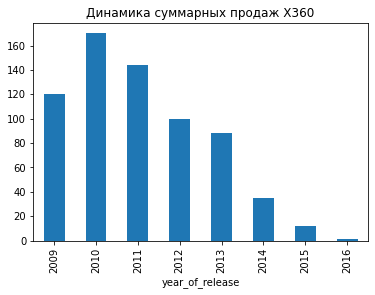

In [ ]:
# Код ревьюера
df_2009.query('platform == "X360"').groupby('year_of_release')['summa'].sum()\
    .plot(kind = 'bar', title = 'Динамика суммарных продаж X360');

***5. Глобальные продажи игр в разбивке по платформам.***

Данные по продажам о всех играх и всех платформах с релизом после 2009 года содержаться в датафрейме df_2009

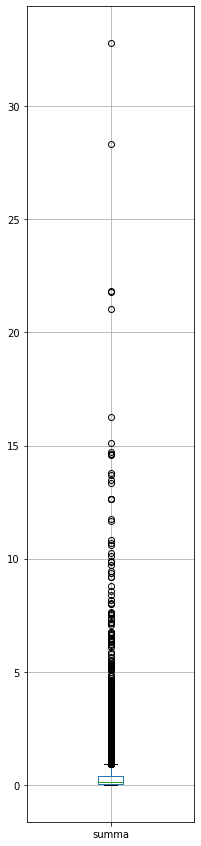

In [ ]:
df_2009.boxplot(column=['summa'], figsize = (3,15));

Мне не очень зашла эта визуализация. Понятнее метод describe(). Все интерисующие цифры видны!

In [ ]:
df_2009['summa'].describe()

count    6703.000000
mean        0.477855
std         1.310133
min         0.010000
25%         0.050000
50%         0.140000
75%         0.400000
max        32.770000
Name: summa, dtype: float64

Среднее значение сильно отличается от медианного. Диаграмма сдвинута вправо.

Посмотрим подобную информацию по самым деньгоприносящим платформам.\
Информация уже отсортирована в разделе 4 и содержиться в датафреймах\
df_ps3_2009\
df_x360_2009\
df_wii_2009\
df_ps4_2009\
df_3ds_2009\
df_ds_2009\
df_xone_2009\
df_pc_2009\
df_psp_2009\
df_wiiu_2009\
df_psv_2009\
df_ps2_2009

count    1051.000000
mean        0.683796
std         1.443843
min         0.010000
25%         0.090000
50%         0.250000
75%         0.720000
max        21.050000
Name: summa, dtype: float64

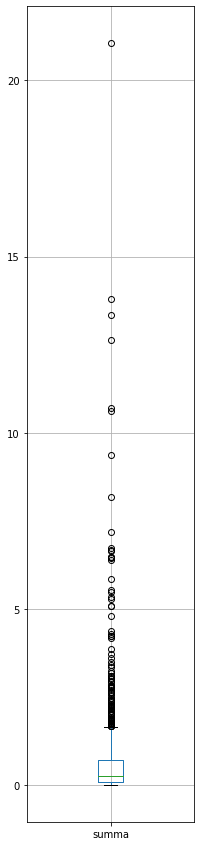

In [ ]:
df_ps3_2009.boxplot(column=['summa'], figsize = (3,15))
df_ps3_2009['summa'].describe()

"Ящик с усами" для лидера поровнее, чем для общего. Также медиана выборки меньше среднего. Примерно 1/7 часть всех проданных игр работает на платформе PS3!

count    852.000000
mean       0.787207
std        1.742073
min        0.010000
25%        0.100000
50%        0.270000
75%        0.780000
max       21.820000
Name: summa, dtype: float64

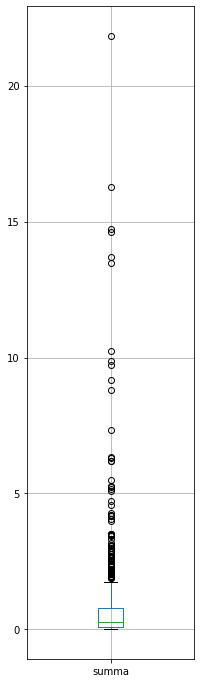

In [ ]:
df_x360_2009.boxplot(column=['summa'], figsize = (3,12))
df_x360_2009['summa'].describe()

Второе место по выручке - игры на платформе Х360. Ни чего нового. На графике хорошо видны выбросы в большую сторону.

count    775.000000
mean       0.554761
std        1.955028
min        0.010000
25%        0.080000
50%        0.180000
75%        0.440000
max       32.770000
Name: summa, dtype: float64

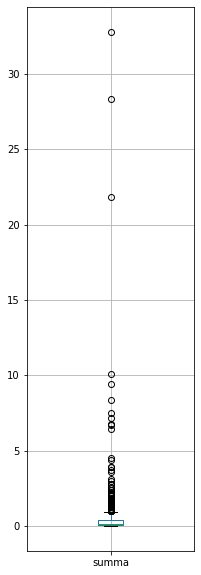

In [ ]:
df_wii_2009.boxplot(column=['summa'], figsize = (3,10))
df_wii_2009['summa'].describe()

Каждая 10 проданная игра играется на платформе Wii. тем не менее налицо уменьшение игр от года выпуска к году выпуска, отмеченных в прошлом выводе.

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: summa, dtype: float64

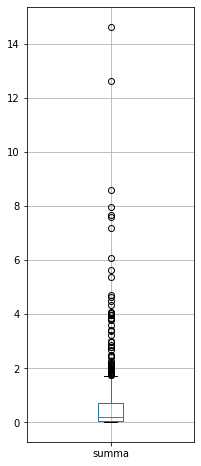

In [ ]:
df_ps4_2009.boxplot(column=['summa'], figsize = (3,8))
df_ps4_2009['summa'].describe()

График похож на все остальные: выбросы в большую сторону, среднее больше медианы, сдвиг вправо.

count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: summa, dtype: float64

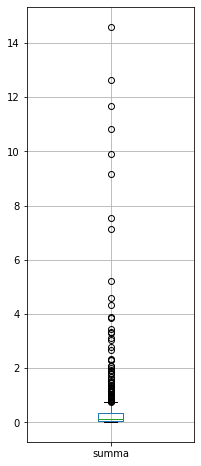

In [ ]:
df_3ds_2009.boxplot(column=['summa'], figsize = (3,8))
df_3ds_2009['summa'].describe()

Добрались до середины ТОП-10. Все как обычно.

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: summa, dtype: float64

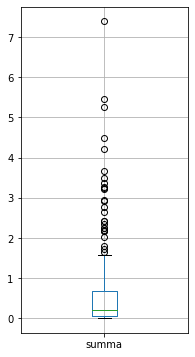

In [ ]:
df_xone_2009.boxplot(column=['summa'], figsize = (3,6))
df_xone_2009['summa'].describe()

Х-One в предыдущем исследовании у нас числиться растущим. График "ящик с усами" не сильно отличается от падающего 3DS, размах в большую сторону может поярче выражен.

count    586.000000
mean       0.236980
std        0.585469
min        0.010000
25%        0.020000
50%        0.060000
75%        0.190000
max        8.010000
Name: summa, dtype: float64

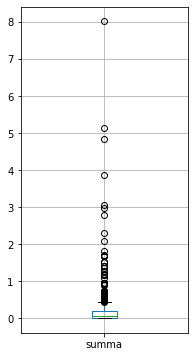

In [ ]:
df_pc_2009.boxplot(column=['summa'], figsize = (3,6))
df_pc_2009['summa'].describe()

count    661.000000
mean       0.154054
std        0.319341
min        0.010000
25%        0.020000
50%        0.060000
75%        0.160000
max        4.870000
Name: summa, dtype: float64

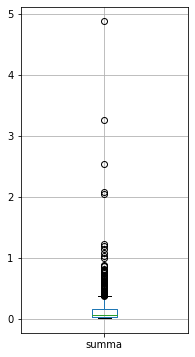

In [ ]:
df_psp_2009.boxplot(column=['summa'], figsize = (3,6))
df_psp_2009['summa'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: summa, dtype: float64

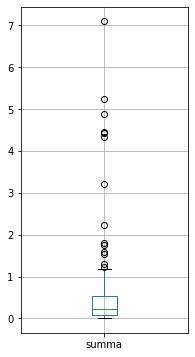

In [ ]:
df_wiiu_2009.boxplot(column=['summa'], figsize = (3,6))
df_wiiu_2009['summa'].describe()

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

По заданию надо построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. То есть на одном графике отобразить несколько платформ - для сравнения медиан, межквартильных размахов и выбросов.</div>

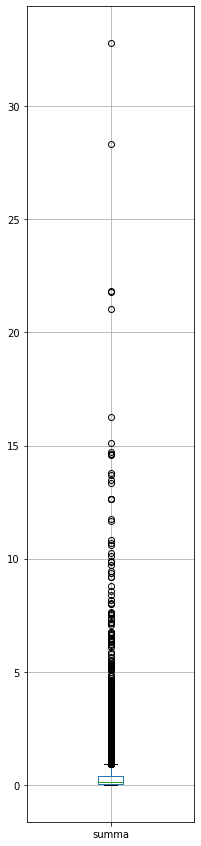

In [ ]:
df_2009.boxplot(column=['summa'], figsize = (3,15)); df_2009 = df[df['year_of_release'] >= 2009]; grup_platform_2009 = df_2009.groupby('platform')['summa'].agg('sum')

Для исследования перспектив развития платформ после 2016 года исследуем глобальные продажи по разбивке по платформам для игр с релизом не позднее 2013 года.

Для этого сформируем датафрейм `df_2013` и выделим из него продажи по ТОП-5 самых продаваемых платформ:

`df_ps3_2013`\
`df_x360_2013`\
`df_wii_2013`\
`df_ps4_2013`\
`df_3ds_2013`

In [ ]:
df_2013 = df[df['year_of_release'] >= 2013] # формируем датафрейм для анализа развития платформ после 2016 года

In [ ]:
df_ps3_2013 = df_2013 [df_2013['platform'] == 'PS3'] # для PS3
df_x360_2013 = df_2013 [df_2013['platform'] == 'X360'] # для X360
df_wii_2013 = df_2013 [df_2013['platform'] == 'Wii'] # для Wii
df_ps4_2013 = df_2013 [df_2013['platform'] == 'PS4'] # для PS4
df_3ds_2013 = df_2013 [df_2013['platform'] == '3DS'] # для 3DS

<AxesSubplot:>

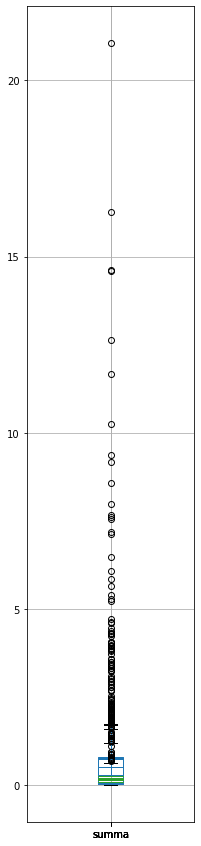

In [ ]:
df_ps3_2013.boxplot(column=['summa'], figsize = (3,15));
df_x360_2013.boxplot(column=['summa'], figsize = (3,15));
df_wii_2013.boxplot(column=['summa'], figsize = (3,15));
df_ps4_2013.boxplot(column=['summa'], figsize = (3,15));
df_3ds_2013.boxplot(column=['summa'], figsize = (3,15))

Для исследования перспектив развития платформ после 2016 года исследуем глобальные продажи по разбивке по платформам для игр с релизом не позднее 2013 года.

Для этого сформируем датафрейм `df_2013` и выделим из него продажи по ТОП-5 самых продаваемых платформ:

`df_ps3_2013`\
`df_x360_2013`\
`df_wii_2013`\
`df_ps4_2013`\
`df_3ds_2013`

In [ ]:
df_2013 = df[df['year_of_release'] >= 2013] # формируем датафрейм для анализа развития платформ после 2016 года

In [ ]:
# формируем датафреймы для пяти наиболее популярных платформ 
df_ps3_2013 = df_2013 [df_2013['platform'] == 'PS3']['summa'] # для PS3
df_xone_2013 = df_2013 [df_2013['platform'] == 'XOne']['summa'] # для XOne
df_wii_2013 = df_2013 [df_2013['platform'] == 'Wii']['summa'] # для Wii
df_ps4_2013 = df_2013 [df_2013['platform'] == 'PS4']['summa'] # для PS4
df_3ds_2013 = df_2013 [df_2013['platform'] == '3DS']['summa'] # для 3DS
# len(df_ps3_2013) # для проверки количества в выборке

In [ ]:
# на базе df_2013 сформируем столбцы необходимые для нашего исследования
df_total_2013 = df_2013.join(df_x360_2013, rsuffix='_xone')
df_total_2013 = df_total_2013.join(df_ps3_2013, rsuffix='_ps3')
df_total_2013 = df_total_2013.join(df_wii_2013, rsuffix='_wii')
df_total_2013 = df_total_2013.join(df_ps4_2013, rsuffix='_ps4')
df_total_2013 = df_total_2013.join(df_3ds_2013, rsuffix='_3ds')
# Удалим лишние для нашего исследования столбцы
df_total_2013 = df_total_2013.drop('rating', axis=1)
df_total_2013 = df_total_2013.drop('user_score', axis=1)
df_total_2013 = df_total_2013.drop('critic_score', axis=1)
df_total_2013 = df_total_2013.drop('other_sales', axis=1)
df_total_2013 = df_total_2013.drop('jp_sales', axis=1)
df_total_2013 = df_total_2013.drop('eu_sales', axis=1)
df_total_2013 = df_total_2013.drop('na_sales', axis=1)
df_total_2013 = df_total_2013.drop('genre', axis=1)
df_total_2013 = df_total_2013.drop('year_of_release', axis=1)
df_total_2013 = df_total_2013.drop('name', axis=1)
df_total_2013 = df_total_2013.drop('platform', axis=1)
df_total_2013 # check

,summa,name_xone,platform_xone,year_of_release_xone,genre_xone,na_sales_xone,eu_sales_xone,jp_sales_xone,other_sales_xone,critic_score_xone,user_score_xone,rating_xone,summa_xone,summa_ps3,summa_wii,summa_ps4,summa_3ds
16,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.05,NaN,NaN,NaN
23,16.27,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,NaN,NaN,NaN,NaN
31,14.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.63,NaN
33,14.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.6
42,12.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16707,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16710,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN
16712,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


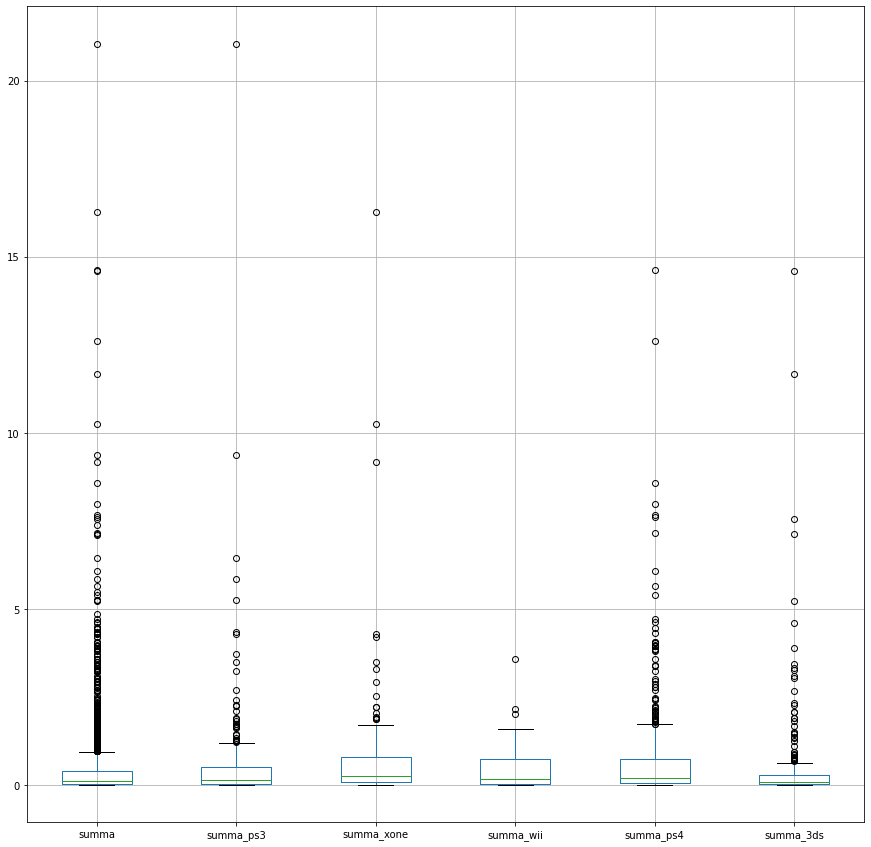

In [ ]:
df_total_2013.boxplot(column=['summa','summa_ps3', 'summa_xone', 'summa_wii', 'summa_ps4', 'summa_3ds'], figsize = (15,15));

Визуализация - так себе!

Я привык к языку цифр.

In [ ]:
df_total_2013.describe()

,summa,year_of_release_xone,na_sales_xone,eu_sales_xone,jp_sales_xone,other_sales_xone,critic_score_xone,user_score_xone,summa_xone,summa_ps3,summa_wii,summa_ps4,summa_3ds
count,2233.000000,186.000000,186.000000,186.000000,186.000000,186.000000,81.000000,143.000000,186.000000,345.000000,23.000000,392.000000,303.000000
mean,0.488442,2013.924731,0.439032,0.228602,0.002742,0.065108,69.234568,5.993007,0.735484,0.525884,0.593913,0.801378,0.472772
std,1.235226,0.932727,1.021400,0.538409,0.007953,0.146303,15.513922,1.613877,1.663275,1.451939,0.915432,1.609456,1.381347
min,0.010000,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.700000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,2013.000000,0.040000,0.020000,0.000000,0.010000,60.000000,5.100000,0.080000,0.040000,0.045000,0.060000,0.040000
50%,0.110000,2014.000000,0.150000,0.080000,0.000000,0.020000,74.000000,6.200000,0.265000,0.150000,0.180000,0.200000,0.090000
75%,0.400000,2015.000000,0.460000,0.207500,0.000000,0.070000,80.000000,7.250000,0.795000,0.510000,0.755000,0.730000,0.280000
max,21.050000,2016.000000,9.660000,5.140000,0.060000,1.410000,97.000000,8.700000,16.270000,21.050000,3.580000,14.630000,14.600000


Изучив таблицу и графики пяти наиболее "деньгоприносящих" платформ в 2016 году в магазине "Стримчик" можно сделать выводы:

Распределение выручек отличается от статуса времени жизненого цикла - у молодых растущих платформ (PS4 и XOne) самые большие межквантильные размахи и несколько выше среднее значение, более ярко выраженный сдвиг вправо.

Стабильная PS3 и умирающая Wii имеют низкий уровень среднего значения и низкий уровень квадратичного отклонения. Срабильность и отсутствие развития влияют на разброс значений в выборке!

По реремендации ревьюера проверяем библиотеку `seaborn` для построения ящика с усами.

<AxesSubplot:xlabel='platform', ylabel='summa'>

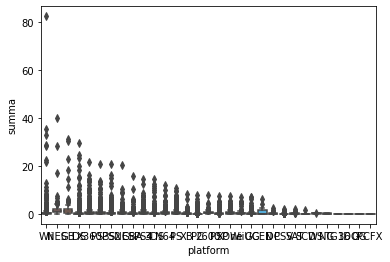

In [ ]:
import seaborn as sns
sns.boxplot(x = df['platform'], y = df['summa'])

<p>
<div class="alert-info">
<b>Комментарий студента 2</b>

Моя красивее.</div>

<div class="alert-warning">
<b>Комментарий ревьюера V3 ⚠️</b>

Обрати внимание, что можно часть устаревших платформ отбросить. Увеличить размер графика и вытянуть ось Y. 👇</div>

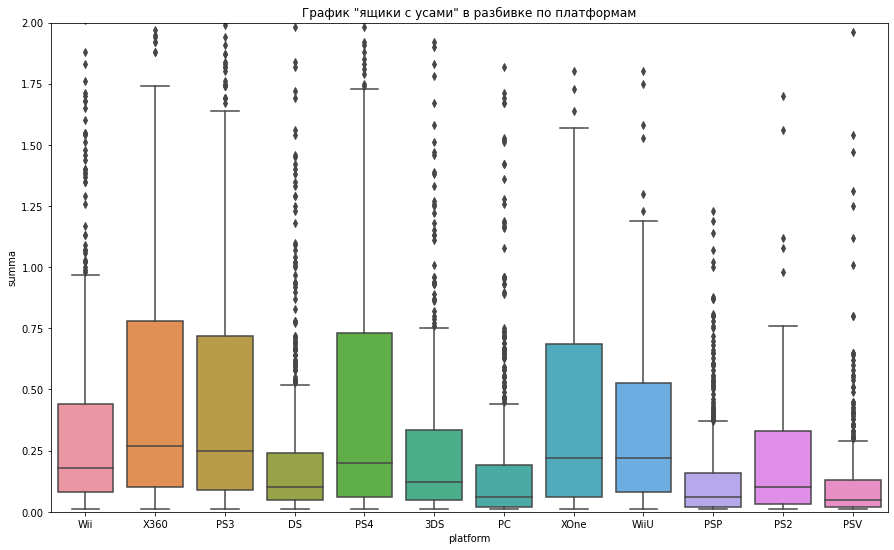

In [ ]:
#Код ревьюера
plt.figure(figsize = (15, 9))
sns.boxplot(x = df_2009['platform'], y = df_2009['summa'])
plt.ylim(0,2)
plt.title('График "ящики с усами" в разбивке по платформам')
plt.show()

# Выводы по разделу 5

Исследовав распределение продаж по всем играм выпущенным с 2009 года и по отсортированным данным по каждой плалатформе из ТОП-10 я пришел к выводам:\
**- Вне зависимости от платформы распределение продаж обычно сдвинуто вправо в сторону увеличения**\
**- Все выбросы отмечены в большую сторону**\
**- Тенденция к росту или падению на графике "ящик с усами" не выявляется.**

# Дополнение к выводам по разделу 5

Дополнительное исследовние пяти наиболее популярных платформ показало, что распределение данных продаж зависит от точки жизненого цикла платформы. У новых растущих платформ ярче выражен сдвиг данных вправо и более высокое среднее.

Для выбора продаваемых игр имеет смысл на это обратить внимание.

***6. Влияние отзывов пользователей и критиков на продажи.***

Влияние отзывов пользователе и критиков предлагаю проводить на играх одной из лидерских платформ - PS3

Аргументы выбора именно этой платформы:
- Лидер продаж;
- Много данных (строк в датафрейме);
- Платформа прошла пятилетний период роста продаж и сейчас наблюдается тенденция к снижению, то есть можно получить данные за большее количество лет.

 Данные о продажах игр с релизом позднее 2009 года для платформы PS3 находятся в датафрейме df_ps3_2009

Предварительные исследования:

In [ ]:
df_ps3_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1051 non-null   object 
 1   platform         1051 non-null   object 
 2   year_of_release  1051 non-null   int64  
 3   genre            1051 non-null   object 
 4   na_sales         1051 non-null   float64
 5   eu_sales         1051 non-null   float64
 6   jp_sales         1051 non-null   float64
 7   other_sales      1051 non-null   float64
 8   critic_score     591 non-null    float64
 9   user_score       655 non-null    float64
 10  rating           720 non-null    object 
 11  summa            1051 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 106.7+ KB


In [ ]:
df_ps3_2009['critic_score'].unique()

array([97., 83., 88., 84., 94., 71., 85., 92., 96., nan, 95., 86., 91.,
       89., 80., 76., 90., 81., 82., 74., 87., 75., 79., 77., 78., 64.,
       70., 63., 93., 55., 72., 52., 66., 65., 68., 73., 57., 67., 60.,
       53., 51., 54., 61., 58., 43., 62., 44., 48., 34., 59., 69., 45.,
       38., 41., 50., 49., 56., 40., 42., 46., 47., 36., 39., 27., 17.,
       35., 13.])

In [ ]:
df_ps3_2009['user_score'].unique()

array([8.2, 5.3, 3.2, 6.4, 7.5, 6.3, 2.6, 6.6, 8.3, 8.8, nan, 4.3, 6.9,
       9.1, 8.6, 7.3, 8. , 8.7, 4.8, 4.5, 8.9, 7.9, 8.1, 7.6, 5.8, 8.4,
       8.5, 7.7, 7.8, 5.4, 7.2, 7.4, 5.5, 6.8, 6.1, 6.7, 4.9, 4.1, 5.1,
       2.7, 6. , 3.5, 6.2, 7.1, 6.5, 5.7, 5.9, 7. , 3.1, 4.6, 3.3, 3.6,
       5.2, 2.1, 3.8, 3.4, 3.9, 5. , 9. , 2.8, 4.2, 1.6, 5.6, 1.7, 4.7,
       3.7, 4.4, 2.4, 4. , 2.9, 0.5, 2. , 0.2, 1. ])

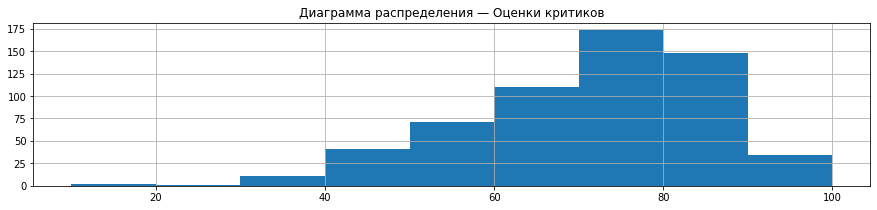

In [ ]:
df_ps3_2009['critic_score'].hist(bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], figsize = (15,3));
plt.title('Диаграмма распределения — Оценки критиков');

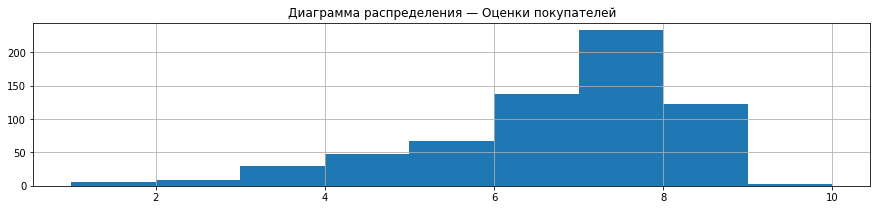

In [ ]:
df_ps3_2009['user_score'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], figsize = (15,3));
plt.title('Диаграмма распределения — Оценки покупателей');

Специалисты и игроки примерно одинаково оценивают игры  для консоли для домашних видеоигр, созданная Sony Interactive Entertainment и выпущенная на рынок 2006-2007 году. К чьему же мнению прислушиваются покупатели видео игр?

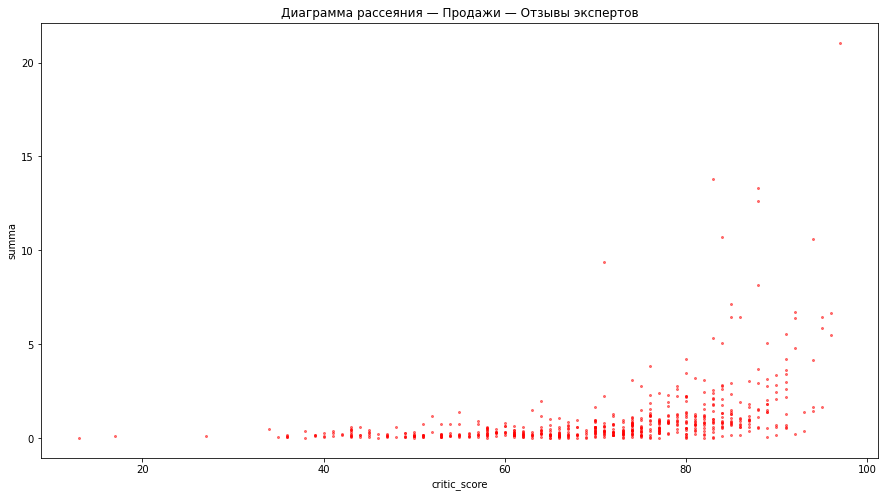

In [ ]:
# check
df_ps3_2009.plot(kind='scatter',
        y='summa' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Продажи — Отзывы экспертов');

Корреляция на графике в явном виде не прослеживается. Посмотрим, что скажут цифры.

In [ ]:
a = df_ps3_2009['summa'].corr(df_ps3_2009['user_score'])
print ('Корреляция между продажами и отзывами пользователей:   ', round(a, 3))

Корреляция между продажами и отзывами пользователей:    0.095


In [ ]:
a = df_ps3_2009['summa'].corr(df_ps3_2009['critic_score'])
print ('Корреляция между продажами и отзывами экспертов:   ', round(a, 3))

Корреляция между продажами и отзывами экспертов:    0.418


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Верно, на PS3, оценки критиков сильнее влияют на успешность игры.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Принял.</div>

Мнения других пользователе практически не влияет на продажи игр на платформе PS3, большее влияние оказывает мнение экспeртов - профессиональных критиков игр, хотя это влияние достаточно низкое.

Проверим это наблюдение на играх других платформ:

df_x360_2009
df_wii_2009
df_pc_2009

In [ ]:
a = df_x360_2009['summa'].corr(df_x360_2009['user_score'])
print ('Корреляция между продажами и отзывами пользователей:   ', round(a, 3), 'для x360')
a = df_x360_2009['summa'].corr(df_x360_2009['critic_score'])
print ('Корреляция между продажами и отзывами экспертов:   ', round(a, 3), 'для x360')
print()
a = df_wii_2009['summa'].corr(df_wii_2009['user_score'])
print ('Корреляция межdf_pc_2009ду продажами и отзывами пользователей:   ', round(a, 3), 'для wii')
a = df_wii_2009['summa'].corr(df_wii_2009['critic_score'])
print ('Корреляция между продажами и отзывами экспертов:   ', round(a, 3), 'для wii')
print()
a = df_pc_2009['summa'].corr(df_pc_2009['user_score'])
print ('Корреляция между продажами и отзывами пользователей:   ', round(a, 3), 'pc')
a = df_pc_2009['summa'].corr(df_pc_2009['critic_score'])
print ('Корреляция между продажами и отзывами экспертов:   ', round(a, 3), 'для pc')
print()

Корреляция между продажами и отзывами пользователей:    0.083 для x360
Корреляция между продажами и отзывами экспертов:    0.364 для x360

Корреляция межdf_pc_2009ду продажами и отзывами пользователей:    0.119 для wii
Корреляция между продажами и отзывами экспертов:    0.223 для wii

Корреляция между продажами и отзывами пользователей:    -0.012 pc
Корреляция между продажами и отзывами экспертов:    0.297 для pc



Корреляция для других платформ еще менее значительна.

# Выводы по разделу 6

Рассмотрев взаимное влияния мнений экспертов и пользователе на продажи можно сделать выводы:

**-Мнения пользователей практически не оказывает влияния на продажи;**\
**-Мнения экспертов - профессиональных критиков игр оказывает незначительное положительное влияние на продажи.**

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Согласен, корреляцию с коэффициентом меньше 0.5 сильной назвать нельзя.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Главное, что корреляция положительная.</div>

***7. Анализ игр по жанрам.***

In [ ]:
 #df_2009.info() # test

genre
Action          810.78
Adventure        81.23
Fighting        113.49
Misc            310.37
Platform        160.25
Puzzle           40.39
Racing          156.37
Role-Playing    362.59
Shooter         549.03
Simulation      104.67
Sports          465.76
Strategy         48.13
Name: summa, dtype: float64


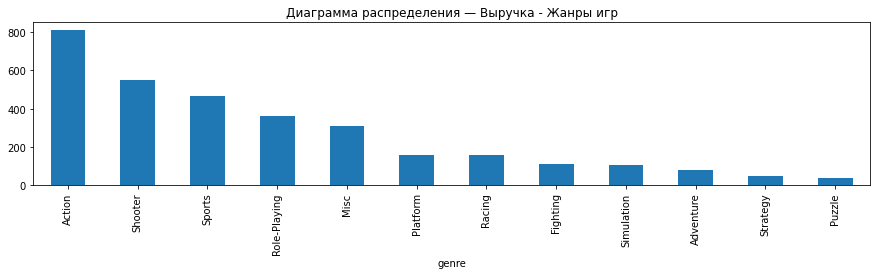

In [ ]:
grup_ganre_2009 = df_2009.groupby('genre')['summa'].agg('sum')
print (grup_ganre_2009)
grup_ganre_2009.sort_values(ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения — Выручка - Жанры игр');

# Выводы по разделу 7

Явными лидерами продаж за 2016 год в магазине «Стримчик»,который продаёт по всему миру компьютерные игры являются игры в жандре `Action` - **810.78 млн. проданных копий**. Следом за лидером идут игры в жандрах `Shooter`, `Sports` и `Role-Playing`. Затем достаточно ровное плато медленно понижающее количество продаж к аусайдерам `Strategy` и `Puzzle` - **40.39 млн. проданных копий.**

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.</div>

Выполняя рекомендации ревьюера рассмотрим распределение продаж внутри лидеров, а также несколько жанров в средей и аусайдерной группы.

In [ ]:
grup_ganre_2013 = df_2013.groupby('genre')['summa'].agg(['sum', 'count', 'mean', 'median'])
print(grup_ganre_2013.sort_values(by='sum', ascending =False))

                 sum  count      mean  median
genre                                        
Action        321.87    766  0.420196   0.110
Shooter       232.98    187  1.245882   0.450
Sports        150.65    214  0.703972   0.240
Role-Playing  145.89    292  0.499623   0.125
Misc           62.82    155  0.405290   0.100
Platform       42.63     74  0.576081   0.225
Racing         39.89     85  0.469294   0.120
Fighting       35.31     80  0.441375   0.125
Adventure      23.64    245  0.096490   0.030
Simulation     21.76     62  0.350968   0.100
Strategy       10.08     56  0.180000   0.080
Puzzle          3.17     17  0.186471   0.060


Для удобства визуального воспиятия домножим среднее и медиану на 1000. То есть в отличии от суммы эти величины на графике будут в 1000 шт, а не в милионах как сумма. Нам это нужно только для вывода на график и взгляда на пропорции, тенденции, взаимное расположение.

In [ ]:
grup_ganre_2013['mean'] = grup_ganre_2013['mean']*1000
grup_ganre_2013['median'] = grup_ganre_2013['median']*1000

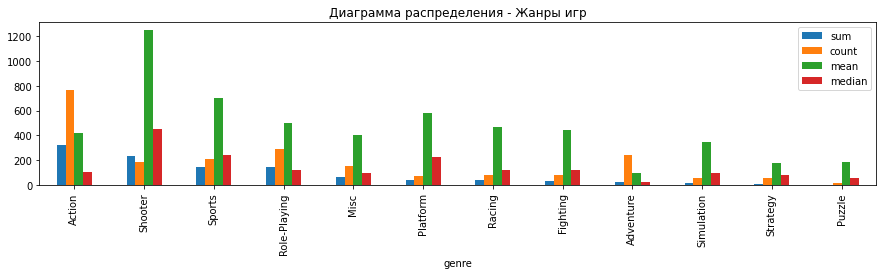

In [ ]:
grup_ganre_2013.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения - Жанры игр');

<div class="alert-success">
<b>Комментарий ревьюера V3 ✔️</b>

Здорово, что вывел на график все метрики, теперь видно, что в среднем каждая игра жанра Shooter продается в большем количестве экземпляров.</div>

# Дополнение к выводу по разделу 7

Рассматривая таблицу и графики можно увидеть ряд интересных моментов. 

На графике (гистограмме) справа на лево от жанра к жанру идет уменьшение продаж.
Но формирование этих продаж у каждого жанра разное. Так наример: Жанр `Action` достаточно большое (привышающее все другие жанры, некоторые даже на порядки) количество игр и невысокое среднее, медианное значение сильно ниже других жанров.

Совсем другая история формирования второго места рейтинга по сумме продаж у игр жанра `Shooter`. Небольшое для лидера списка количество игр, высочайшее среденне (это высокая цена каждой игры) и невысокая, по сравнению со средним, медиана.

Интересно формирование продаж спортивных и ролевых игр - `Sports` и `Role-Playing`. Все показатели очень средние. Уменьшение продаж по количеству или падение или увеличение среднего (цены продукта) не приведет к катастрофическим изменениям продаж.

Такая же ситуация с гонками `Racing`, приключениями `Adventure` и стратегиями `Strateg`y - эти игры скорее всего будут приносить **стабильную выручку** магазину "Стримчик" вне зависимости от изменении коньюктуры.

***8.1 Анализ пользователей.*** Жанры.

В предложенных данных покупки пользователей разбиты на 4 региона:

- **NA_sales** — продажи в Северной Америке (миллионы проданных копий);
- **EU_sales** — продажи в Европе (миллионы проданных копий);
- **JP_sales** — продажи в Японии (миллионы проданных копий);
- **Other_sales** — продажи в других странах (миллионы проданных копий).

Рассмотрим повнимательнее 3 региона, явно обозначенные географически Регинон Other_sales отдельно выделять не будем, так как продажи по нему скорее всего объединяют разноплановые страны и Африки и Латинской Америки  и Ближнего Востока с разными предпочтениями.

Рассмотрим долю продаж для каждого региона, включая Other_sales:

genre
Action          810.78
Adventure        81.23
Fighting        113.49
Misc            310.37
Platform        160.25
Puzzle           40.39
Racing          156.37
Role-Playing    362.59
Shooter         549.03
Simulation      104.67
Sports          465.76
Strategy         48.13
Name: summa, dtype: float64


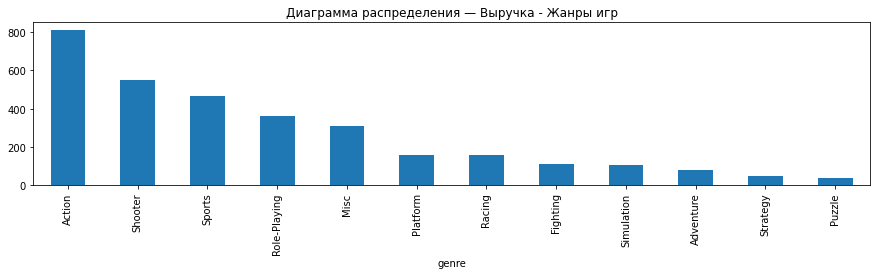

In [ ]:
grup_ganre_2009 = df_2009.groupby('genre')['summa'].agg('sum')
print (grup_ganre_2009)
grup_ganre_2009.sort_values(ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения — Выручка - Жанры игр');

In [ ]:
summa_na_sales = df_2009['na_sales'].sum()
summa_eu_sales = df_2009['eu_sales'].sum()
summa_jp_sales = df_2009['jp_sales'].sum()
summa_other_sales = df_2009['other_sales'].sum()
# для удобства обработки сформируем 
#summa_reg
# with Data set
sales_reg = [[summa_na_sales,"summa_na_sales"], 
               [summa_eu_sales,"summa_eu_sales"],
               [summa_jp_sales,"summa_jp_sales"], 
               [summa_other_sales,"summa_other_sales"]]
  
# creating a pandas dataframe
df_summa_sales = pd.DataFrame(sales_reg,columns=["summa","region"])
  
# printing dataframe 
print(df_summa_sales)

     summa             region
0  1465.96     summa_na_sales
1  1029.15     summa_eu_sales
2   367.03     summa_jp_sales
3   340.92  summa_other_sales


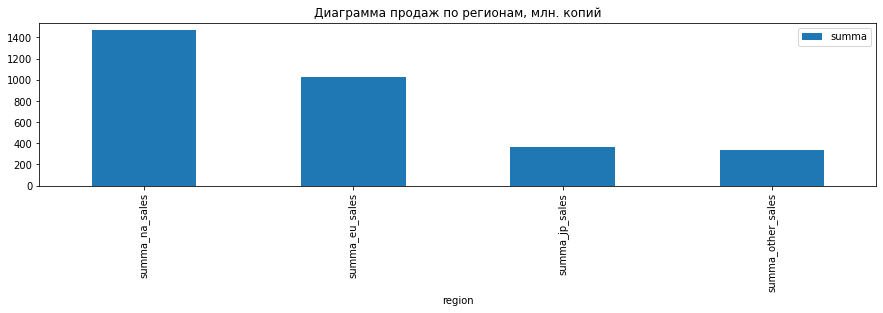

In [ ]:
df_summa_sales.sort_values(by='summa', ascending =False).plot(kind = "bar", figsize = (15,3), x='region'); # 
#Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма продаж по регионам, млн. копий');

Поняв, как распределены по регионам общие продажи, сделаем анализ предпочтений по жандрам игр для каждого региона.

Регион лидер - Северная Америка.

                 sum
genre               
Action        361.72
Shooter       276.37
Sports        227.66
Misc          164.40
Role-Playing  130.83
Platform       74.93
Racing         61.04
Fighting       56.56
Simulation     43.74
Adventure      30.69
Puzzle         20.19
Strategy       17.83


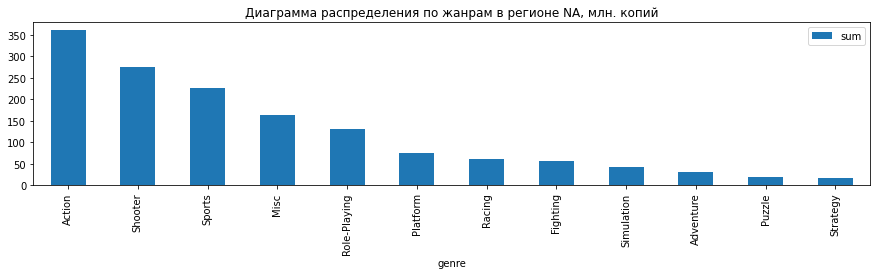

In [ ]:
t = df_2009.groupby('genre',dropna=False)['na_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по жанрам в регионе NA, млн. копий');

Лидеры и аусайдеры игровых предпочтений совпадают с распределением по всем регионов.

Следующая на очереде - старушка Европа.

                 sum
genre               
Action        271.91
Shooter       192.30
Sports        158.51
Misc           86.27
Role-Playing   83.56
Racing         67.63
Platform       49.68
Simulation     37.90
Fighting       27.74
Adventure      24.32
Strategy       17.31
Puzzle         12.02


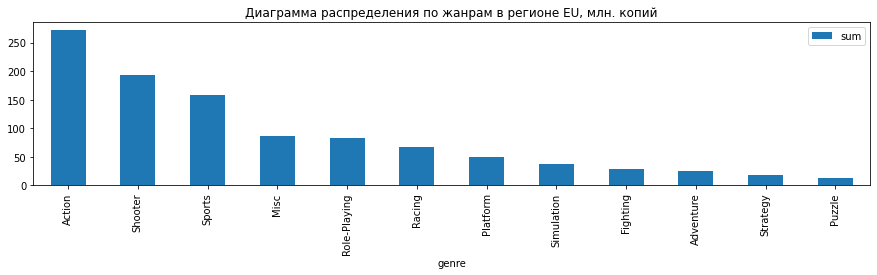

In [ ]:
t = df_2009.groupby('genre',dropna=False)['eu_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по жанрам в регионе EU, млн. копий');

Все также как в Америке, лишь аусайдеры поменялись местами. Ну, и чуть-чуть по-жиже.

Теперь Япония.

                 sum
genre               
Role-Playing  120.61
Action         84.16
Misc           30.09
Sports         25.32
Platform       20.65
Adventure      19.02
Fighting       16.92
Shooter        15.16
Simulation     14.25
Strategy        8.62
Racing          7.18
Puzzle          5.05


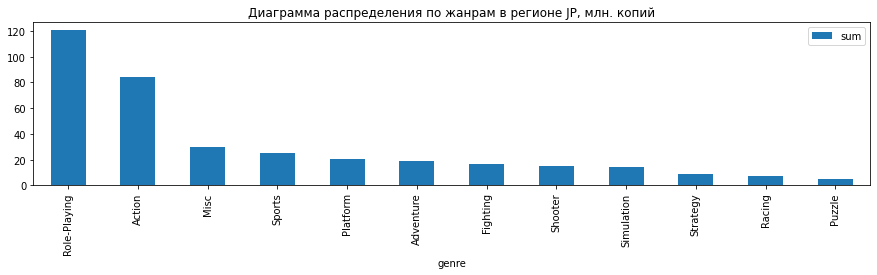

In [ ]:
t = df_2009.groupby('genre',dropna=False)['jp_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по жанрам в регионе JP, млн. копий');

На первое место выходят ролевые игры (`Role-Playing`) и `Action`. Средняя зона не сильно отличается от аусайдеров - она более равномерна, чем в Европе и Америке. Уровень в 2 раза ниже европейского, да и народу там меньше. Населения почти в 6 раз меньше, а покупают игр в магазине "Стримчик" всего в 2 раза меньше!

***8.1 Анализ пользователей.*** Игровые платформы.

В предложенных данных покупки пользователей разбиты на 4 региона:

- **NA_sales** — продажи в Северной Америке (миллионы проданных копий);
- **EU_sales** — продажи в Европе (миллионы проданных копий);
- **JP_sales** — продажи в Японии (миллионы проданных копий);
- **Other_sales** — продажи в других странах (миллионы проданных копий).

Рассмотрим повнимательнее 3 региона, явно обозначенные географически Регинон Other_sales отдельно выделять не будем, так как продажи по нему скорее всего объединяют разноплановые страны и Африки и Латинской Америки  и Ближнего Востока с разными предпочтениями.

Рассмотрим долю продаж для каждого региона, включая Other_sales:

platform
3DS     257.81
DS      243.29
PC      138.87
PS2      32.49
PS3     718.67
PS4     314.14
PSP     101.83
PSV      53.81
Wii     429.94
WiiU     82.19
X360    670.70
XOne    159.32
Name: summa, dtype: float64


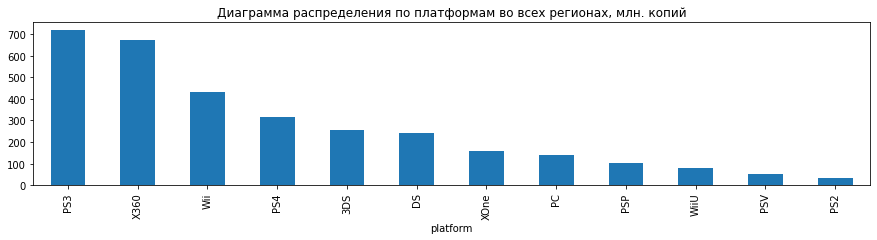

In [ ]:
grup_platform_2009 = df_2009.groupby('platform')['summa'].agg('sum')
print (grup_platform_2009)
grup_platform_2009.sort_values(ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по платформам во всех регионах, млн. копий');

Cделаем анализ предпочтений по платформам игр для каждого региона.

Северная Америка

             sum      ratio
platform                   
X360      408.18  27.843870
PS3       291.90  19.911867
Wii       235.75  16.081612
DS        120.61   8.227373
PS4       108.74   7.417665
XOne       93.12   6.352151
3DS        82.65   5.637944
PC         40.49   2.762013
WiiU       38.10   2.598980
PSP        22.27   1.519141
PSV        12.47   0.850637
PS2        11.68   0.796748


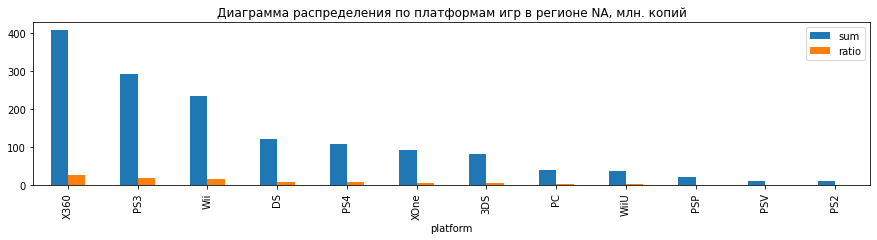

In [ ]:
t = df_2009.groupby('platform',dropna=False)['na_sales'].agg(['sum'])
t['ratio'] = (t ['sum'] / t['sum'].sum())*100
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по платформам игр в регионе NA, млн. копий');

Самые популярные платформы в Северной Америке:

- X360 с долей рынка - *27.84%*
- PS3  с долей рынка - *19.91%*
- Wii  с долей рынка - *16.08%*
- DS   с долей рынка - *8.22%*
- PS4  с долей рынка - *7.41%*

Европа

             sum      ratio
platform                   
PS3       255.00  24.777729
X360      196.72  19.114803
PS4       141.09  13.709372
Wii       124.22  12.070155
PC         82.32   7.998834
3DS        61.27   5.953457
DS         53.89   5.236360
XOne       51.59   5.012875
WiiU       25.13   2.441821
PSP        18.24   1.772336
PSV        13.07   1.269980
PS2         6.61   0.642278


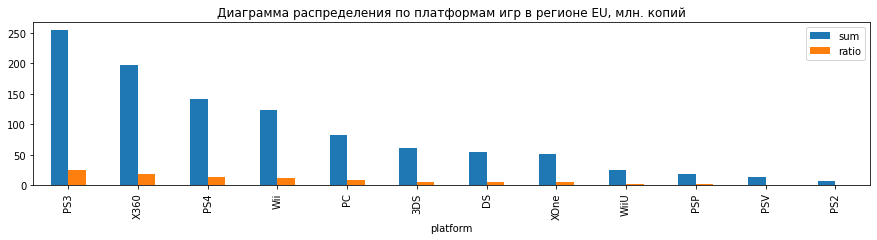

In [ ]:
t = df_2009.groupby('platform',dropna=False)['eu_sales'].agg(['sum'])
t['ratio'] = (t ['sum'] / t['sum'].sum())*100
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по платформам игр в регионе EU, млн. копий');

Самые популярные платформы в Европе:

- PS3  с долей рынка - *24.77%*
- X360 с долей рынка - *19.11%*
- PS4  с долей рынка - *13.71%*
- Wii  с долей рынка - *12.07%*
- PC   с долей рынка - *7.99%*

Япония

             sum      ratio
platform                   
3DS       100.62  27.414653
PS3        68.29  18.606108
DS         52.11  14.197750
PSP        50.39  13.729123
Wii        34.32   9.350734
PSV        21.84   5.950467
PS4        15.96   4.348418
WiiU       13.01   3.544669
X360        7.41   2.018909
PS2         2.74   0.746533
XOne        0.34   0.092635
PC          0.00   0.000000


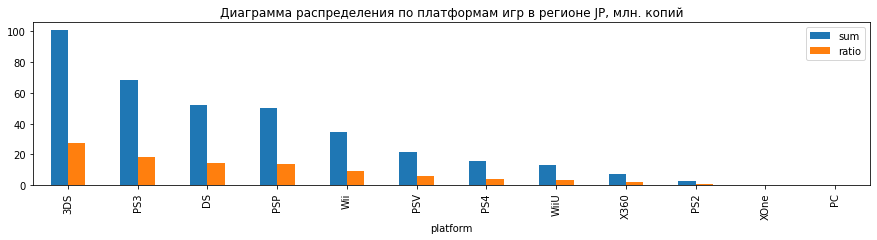

In [ ]:
t = df_2009.groupby('platform',dropna=False)['jp_sales'].agg(['sum'])
t['ratio'] = (t ['sum'] / t['sum'].sum())*100
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по платформам игр в регионе JP, млн. копий');

Самые популярные платформы в Японии:

- 3DS  с долей рынка - *27.41%*
- PS3  с долей рынка - *18.60%*
- DS   с долей рынка - *14.19%*
- PSP  с долей рынка - *13.72%*
- Wii  с долей рынка - *9.35%*

**Потребители в Америке похожи на потребителей в Европе, но не похожи на японцев.**

Попробуем оценить как влияет наличие рейтинга от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Считаем, что пропуски в строке rating - это отсутствие рейтинга, а любой рейтинг - наличие. Если влияния на предпочтения потребителей нет, то игры распределятся равномерно в соответствии с пропорцией (количество покупок игр с рейтингом / общее количество покупок в регионе)

In [ ]:
# контрольная пропорция ratio_control
ratio_control =  df_2009[df_2009['rating'].notna()]['summa'].sum() / df_2009['summa'].sum()
print (ratio_control)

0.8111306063576703


Подготовим данные для визуализации.

In [ ]:
# is_rating
summa_na_sales_ratig = df_2009[df_2009['rating'].notna()]['na_sales'].sum()
summa_eu_sales_rating = df_2009[df_2009['rating'].notna()]['eu_sales'].sum()
summa_jp_sales_rating = df_2009[df_2009['rating'].notna()]['jp_sales'].sum()
summa_other_sales_rating = df_2009[df_2009['rating'].notna()]['other_sales'].sum()
# для удобства обработки сформируем 
#summa_reg
# with Data set
sales_reg_ratig = [[summa_na_sales_ratig,"summa_na_sales_ratig"], 
               [summa_eu_sales_rating,"summa_eu_sales_ratig"],
               [summa_jp_sales_rating,"summa_jp_sales_ratig"], 
               [summa_other_sales_rating,"summa_other_sales_ratig"]]
  
# creating a pandas dataframe
df_summa_sales_ratig = pd.DataFrame(sales_reg_ratig,columns=["summa","region"])

#no_rating
summa_na_sales_ratig_no = summa_na_sales - summa_na_sales_ratig
summa_eu_sales_rating_no = summa_eu_sales - summa_eu_sales_rating
summa_jp_sales_rating_no = summa_jp_sales - summa_jp_sales_rating
summa_other_sales_rating_no = summa_other_sales - summa_other_sales_rating
# для удобства обработки сформируем 
#summa_reg
# with Data set
sales_reg_ratig_no = [[summa_na_sales_ratig_no,"summa_na_sales_ratig_no"], 
               [summa_eu_sales_rating_no,"summa_eu_sales_ratig_no"],
               [summa_jp_sales_rating_no,"summa_jp_sales_ratig_no"], 
               [summa_other_sales_rating_no,"summa_other_sales_ratig_no"]]
  
# creating a pandas dataframe
df_summa_sales_ratig_no = pd.DataFrame(sales_reg_ratig_no,columns=["summa","region"])
      
# printing dataframe 
print(df_summa_sales)
print(df_summa_sales_ratig)
print(df_summa_sales_ratig_no)

     summa             region
0  1465.96     summa_na_sales
1  1029.15     summa_eu_sales
2   367.03     summa_jp_sales
3   340.92  summa_other_sales
     summa                   region
0  1275.39     summa_na_sales_ratig
1   862.94     summa_eu_sales_ratig
2   168.53     summa_jp_sales_ratig
3   291.24  summa_other_sales_ratig
    summa                      region
0  190.57     summa_na_sales_ratig_no
1  166.21     summa_eu_sales_ratig_no
2  198.50     summa_jp_sales_ratig_no
3   49.68  summa_other_sales_ratig_no


In [ ]:
df_join = df_summa_sales.join(df_summa_sales_ratig, rsuffix='_rating') 
df_join = df_join.join(df_summa_sales_ratig_no, rsuffix='_rating_no')
df_join = df_join.drop('region_rating', axis=1)
df_join = df_join.drop('region_rating_no', axis=1)
df_join = df_join.set_index('region')
print(df_join)

                     summa  summa_rating  summa_rating_no
region                                                   
summa_na_sales     1465.96       1275.39           190.57
summa_eu_sales     1029.15        862.94           166.21
summa_jp_sales      367.03        168.53           198.50
summa_other_sales   340.92        291.24            49.68


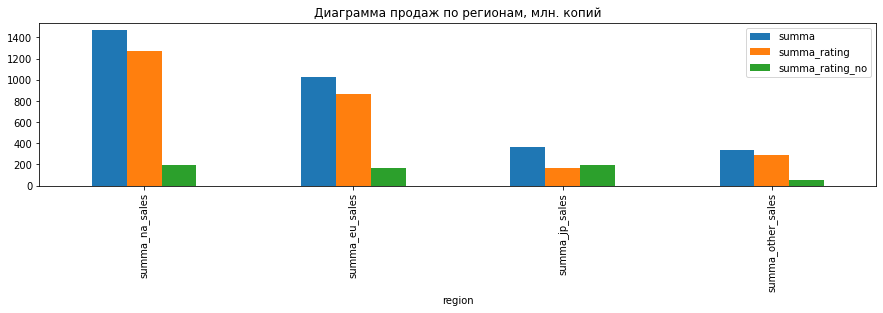

In [ ]:
df_join.sort_values(by='summa', ascending =False).plot(kind = "bar", figsize = (15,3)); # 
#Придварительно отсортировав 
#Для удобства визуального восприятия
plt.title('Диаграмма продаж по регионам, млн. копий');

In [ ]:
# добовляем столбец ratio_reg
df_join['ratio_reg'] = df_join['summa_rating'] / df_join['summa'] 
print (df_join)

                     summa  summa_rating  summa_rating_no  ratio_reg
region                                                              
summa_na_sales     1465.96       1275.39           190.57   0.870003
summa_eu_sales     1029.15        862.94           166.21   0.838498
summa_jp_sales      367.03        168.53           198.50   0.459172
summa_other_sales   340.92        291.24            49.68   0.854277


Мы выяснили, что игроки в Японии покупают значительно меньше игр, которые рейтингованы по возрастной категории.

Но мне в голову не приходит, как эту информацию можно использовать.

На основании рекомендации ревьюера изменим подход к поиску зависимосити продаж в различных регионах от рейтинга ESRB.

Какие же рейтинги ESRB покупают в разных регионах?

Северная Америка

           sum
rating        
M       165.21
E        79.05
E10+     54.24
T        49.79


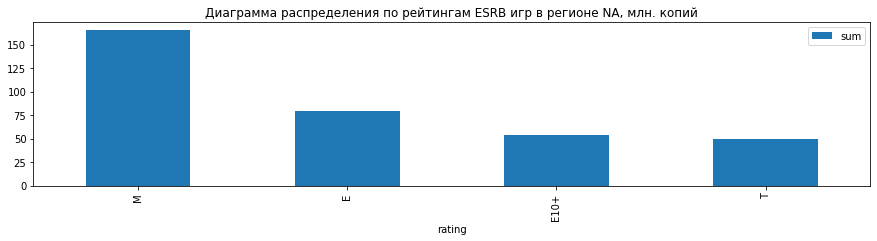

In [ ]:
t = df_2013.groupby('rating',dropna=True)['na_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по рейтингам ESRB игр в регионе NA, млн. копий');

Наиболее популярны у американцев игры следующих категорий ESRB:\
«M» («Mature») — «Для взрослых»\
«E» («Everyone») — «Для всех»

Менее популярны:\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
«T» («Teen») — «Подросткам»

Европа

           sum
rating        
M       145.32
E        83.36
E10+     42.69
T        41.95


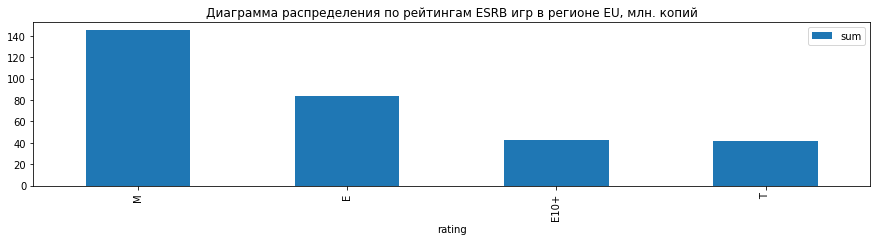

In [ ]:
t = df_2013.groupby('rating',dropna=True)['eu_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по рейтингам ESRB игр в регионе EU, млн. копий');

Наиболее популярны у европейцев также как и у американцев игры следующих категорий ESRB:\
«M» («Mature») — «Для взрослых»\
«E» («Everyone») — «Для всех»

Менее популярны:\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
«T» («Teen») — «Подросткам»

Япония

          sum
rating       
T       20.59
E       15.14
M       14.11
E10+     5.89


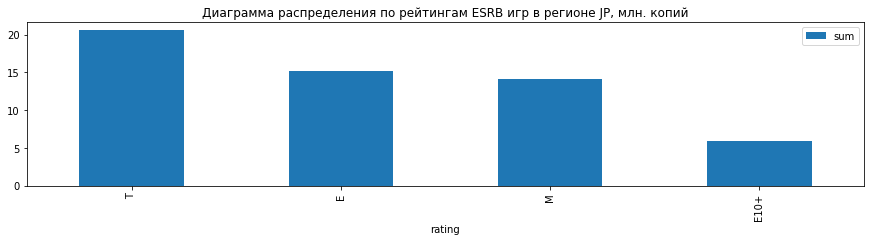

In [ ]:
t = df_2013.groupby('rating',dropna=True)['jp_sales'].agg(['sum'])
print (t.sort_values(by='sum', ascending =False))
t.sort_values(by='sum', ascending =False).plot(kind = "bar", figsize = (15,3)); # Придварительно отсортировав 
#                                                                                  для удобства визуального восприятия
plt.title('Диаграмма распределения по рейтингам ESRB игр в регионе JP, млн. копий');

Наиболее популярны у японцев игры следующих категорий ESRB:\
«T» («Teen») — «Подросткам»\
«E» («Everyone») — «Для всех»

Менее популярны:\
«M» («Mature») — «Для взрослых»\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

Другое воспитание - Азия, что возьмешь?

# Выводы по разделу 8

В 8 разделе выполнен анализ пользователей в различных регионах по используемым платформам и жандрам игр.

Выяснено, что в разных регионах продаж пользователи отдают разное предпочтение разным жанрам игр:
Самыми популярными по общей отчетности являются жанры:

- **Action** 
- **Shooter**

А самыми низкопродаваемыми

- **Strategy**
- **Puzzle**

***В северо-американском регионе лидеры и аусайдеры такие:***

Лидеры продаж:

- **Action**
- **Shooter**\
Самые популярные платформы в Северной Америке:

- X360 с долей рынка - *27.84%*
- PS3  с долей рынка - *19.91%*
- Wii  с долей рынка - *16.08%*
- DS   с долей рынка - *8.22%*
- PS4  с долей рынка - *7.41%*

А самыми низкопродаваемыми

- **Puzzle**
- **Strategy**


***В Евопе лидеры и аусайдеры такие же:***

Лидеры продаж:

- **Action** 
- **Shooter**\
Самые популярные платформы в Европе:

- PS3  с долей рынка - *24.77%*
- X360 с долей рынка - *19.11%*
- PS4  с долей рынка - *13.71%*
- Wii  с долей рынка - *12.07%*
- PC   с долей рынка - *7.99%*

А самыми низкопродаваемыми

- **Puzzle**
- **Strategy**


***Несколко другая картина в Японии:***

Лидеры продаж:

- **Role-Playing**
- **Action** \
Самые популярные платформы в Японии:

- 3DS  с долей рынка - *27.41%*
- PS3  с долей рынка - *18.60%*
- DS   с долей рынка - *14.19%*
- PSP  с долей рынка - *13.72%*
- Wii  с долей рынка - *9.35%*

А самыми низкопродаваемыми

- **Racing**
- **Puzzle**

**Обращает на себя внимание, что рынок Северной Америки достаточно похож на рынок Европы и по лидерам продаж по жандрам игр и по платформам устройств для игр, но сильно отличается от японского рынка**. 

Изыскания по вопросу влияния **рейтинга ESRB** компьютерных игр по присвоению возрастной категории, не дал положительных результатов. Какого либо вслияния этого рейтинга на покуки в магазине **не выяснено**!


Зато по рекомендации ревьюера выяснены предпочтенния в разных регионах рейтингов ESRB.

В Европе и Северной Америке любят играть в игры для взрослых - «M» («Mature») — «Для взрослых», а в Японии - подростковые игры «T» («Teen») — «Подросткам».

***9.1 Анализ гипотиз.*** Рейтинги платформ.

По популярности во всех регионах игры на платформе Xbox One и РС находятся в средней части рейтинга рядом друг с другом. Было предположено, что рейтинги игр на этих платформах одинаковы.

Предпологается сформулировать и проверить эту гипотизу.


***H0***: Рейтинги пользователей игр для платформы Xbox One **равны** рейтингам игр пользователей игр для платформы РС.

Если эта нулевая гипотиза не подтвердиться, примем другую гипотизу:

***Н1***: Рейтинги пользователей игр для платформы Xbox **не равны** рейтингам игр пользователей игр для платформы РС.

Выборки данных после 2009 года для рейтингов игр пользователей  этих двух платформ размещены в датафреймах:

`df_xone_2009` - сформировах в 1-3 разделах

`df_pc_2009`   - сформировах в 1-3 разделах

Непосредственно столбцы:

`df_xone_2009['user_score']`

`df_pc_2009['user_score']`

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам воспользуемся методом `st.ttest_ind из scipy.`

`equal_var = True`. Нам заранее не известно о дисперсиях двух выборок!

Предварительно удалим пропущенные значения

`df_xone_2009['user_score'].dropna()`

`df_pc_2009['user_score'].dropna()`

In [ ]:
from scipy import stats as st
sample_1 = df_xone_2009['user_score'].dropna() # sample_1 - выборка из первой генеральной совокупности
sample_2 = df_pc_2009['user_score'].dropna() # sample_2 - выборка из второй генеральной совокупности
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.29856178733970584


Р-valiue  получилось больше 5 % - порогового результата - вероятности наблюдать полученный результат, при условии, что нулевая гипотиза верна. 30% - большой результат, значит нулевая гипотиза верна!

***9.2 Анализ гипотиз.*** Рейтинги жанров.

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Жанры игр, продающихся по всему миру в магазине "Стримчик" были ранжированы в 8 разделе исследования. Наиболее популярным жанром был выявлен Action. Спортивные игры  в том ретинге занмали 3е место. Высказывалась гипотиза, что пользовательские рейтинги жанров Action и Sports разные.

Сформулируем и проверим альтернативную гипотизу, если она окажетося неверна, то будет верна нужная к проверке нам гипотиза:
    

H0: Рейтинги пользователей игр жанров Action равны рейтингам игр пользователей игр жанров Sports.

Если эта нулевая гипотиза не подтвердиться, примем другую гипотизу, которую нам и нужно проверить:

Н1: Рейтинги пользователей игр жанров Action не равны рейтингам игр пользователей игр жанров Sports.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Здесь также - нулевая и альтернативная гипотезы сформулированы правильно!</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Принял.</div>

Данные о отзывах пользователей для этих двух жанрах содержаться в датафрейме `df_2009`.

выборки выглядят так:

`df_2009[df_2009['genre'] == 'Action']['user_score'].dropna()`

`df_2009[df_2009['genre'] == 'Sports']['user_score'].dropna()`

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам воспользуемся методом `st.ttest_ind из scipy.`

В качестве порогового результата примем 1 %  - вероятности наблюдать полученный результат, при условии, что нулевая гипотиза верна.

`equal_var = True`. Нам заранее не известно о дисперсиях двух выборок!

In [ ]:
from scipy import stats as st
sample_1 = df_2009[df_2009['genre'] == 'Action']['user_score'].dropna() # sample_1 - выборка из первой генеральной совокупности
sample_2 = df_2009[df_2009['genre'] == 'Sports']['user_score'].dropna() # sample_2 - выборка из второй генеральной совокупности
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  3.493323839142097e-13


Вероятность наблюдать такой результат бесконечно мала. Нулевая гипотеза не подтврдилась, значит подтвердилась противоположная - Н1: Рейтинги пользователей игр жанров Action не равны рейтингам игр пользователей игр жанров Sports. Подтвердилась именно та гипотиза, которую нам нужно было проверить!

# Выводы по разделу 9

В разделе 9 были рассмотрены две гипотизы о рейтинге платформ и рейтинге жанров. Подтвердились обе гипотизы:

-  Рейтинги пользователей игр для платформы Xbox One равны рейтингам игр пользователей игр для платформы РС;
-  Пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Общие выводы по учебной работе.

 В учебной работе изучаласть отчетность за 2016 год. Предпологалось, что **данные неполные**, так как формировались в 2016 году за 2016 год.
 
Предлогалось выявить определяющие успешность игры закономерности. Это бы позволило сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проведены следующие виды работ:
- Подготовлены к иследованию данные;
- Проведены  предварительные исседования (приведены названия столбцов к правилам PYTHON, отсечены пропуски)
- Выявлен **промежуток времени** выпуска игр, влияющий на решения о дальнейших тенденциях **(с 2013 года по настоящее время)**; 

На актуальных данных проведены исследования и получены следующие результаты:

- Оценены игры по платформам. Выявлены игры на платформах, которые имеют тенденцию к росту в следующем году:

**- Х360**\
**- PS4**\
**- XOne**;

Оценено влияния отзывов критиков и покупателей на продажи игр – **особого влияния рейтинги на продажи не оказывают**. (нескколько большее влияние выявлено от мнения пользователей)

Проведен анализ пользователей с точки зрения жанров игр и популярных платформ:
**Европейский** и северо-**американский** потребитель **похожи** друг на друга: 

Их любимые жанры:

- **Action** 
- **Shooter**

В Японии же любимые жанры:

- **Role-Playing**
- **Action** \

Отмечены стабильно продающиеся жанры игр - `Sports` и `Role-Playing` в верхней части таблицы и `Racing`, `Adventure` и `Strategy` в нижней - эти игры скорее всего будут приносить стабильную выручку магазину "Стримчик" вне зависимости от изменении коньюктуры

Платформы тоже отличаются от региона продажи.

Популярные в Европе и Америке:
- **X360** 
- **PS3**   
- **Wii**  

Популярные в Японии:
- **3DS** 
- **PS3** 
- **DS** 

Выявлены наиболее покупаемые в различных регионах игры по рейтингу ESRB.

В Европе и Северной Америке любят играть в игры для взрослых - «M» («Mature») — «Для взрослых», а в Японии - подростковые игры «T» («Teen») — «Подросткам».

Проанализированы и подтверждены две гипотизы:
- **Рейтинги пользователей** игр для платформы **Xbox One равны** рейтингам игр пользователей игр для платформы **РС**;
- **Пользовательские рейтинги жанров Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») **разные**.

**Рекомендации магазину:**

- Отслеживать появление новых платформ игр. Как правило игры на новых вновь появившихся платформах демонстрируют бурный рост в начале продаж.
- Не обращать внимание на отзывы игроков вообще и на отзывы профессиональных критиков в меньшей мере при планировании выбора игр. Значительного влияния на выбор других покупателей эти рейтинги не оказывают.
- Покупательское поведение европейцев похоже на американское и отличается от японского. Японцы играют в другие игры и на других приставках, чем европейцы и америкацы. Это надо учитывать при проведении региональной торговли. 

In [ ]:
df.info() # проверка, что все ячейки сработали

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  summa            16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB
